# Startup Success Analysis - **Data Mining Final Project**

Juan Marbis - Gabriel Cardenas - Pol Soriano - Dimas Fernandez

## Can we predict startup success using Twitter?

## **Libraries:**

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit, cross_val_score
sklearn.set_config(print_changed_only=True)
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

## **Data loading & Exploration:**

In [68]:
import pandas as pd
df = pd.read_csv('startup_traction.csv')
df.head()



,Unnamed: 0,name,country,city,web,PIC,stage_order,stage_name,tweet_count,tweet_length,...,reply_ratio,reply_rate,like_count,like_rate,like_ratio,quote_count,quote_rate,quote_ratio,engagement_ratio,stage_success
0,669,N.P.T. S.R.L.,ITALY,VALSAMOGGIA BO,NaN,917744355,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1236,ADVANCED MATERIALS SRL,ITALY,LAIVES,http://www.airlite.eu,935677812,1,INCEPTION,636.0,170.550314,...,0.031447,0.035273,547.0,0.964727,0.860063,547.0,0.964727,0.860063,71.408805,0
2,1643,GRAPHENEA SA,SPAIN,SAN SEBASTIAN GUIPUZCOA,http://www.graphenea.com,971995582,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,331,CROIVALVE LIMITED,IRELAND,DUBLIN,http://www.croivalve.com,909573463,1,INCEPTION,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,614,OU COGNUSE,ESTONIA,TALLINN,http://www.cognuse.com,916757671,1,INCEPTION,126.0,137.015873,...,0.031746,0.001584,96.0,0.038020,0.761905,96.0,0.038020,0.761905,5.880952,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               700 non-null    int64  
 1   name                     700 non-null    object 
 2   country                  700 non-null    object 
 3   city                     700 non-null    object 
 4   web                      649 non-null    object 
 5   PIC                      700 non-null    int64  
 6   stage_order              700 non-null    int64  
 7   stage_name               700 non-null    object 
 8   tweet_count              309 non-null    float64
 9   tweet_length             309 non-null    float64
 10  tweet_rate               309 non-null    float64
 11  original_ratio           307 non-null    float64
 12  retweeted_ratio          289 non-null    float64
 13  replied_to_ratio         243 non-null    float64
 14  quoted_ratio             2

In [70]:
df.describe()

,Unnamed: 0,PIC,stage_order,tweet_count,tweet_length,tweet_rate,original_ratio,retweeted_ratio,replied_to_ratio,quoted_ratio,...,reply_ratio,reply_rate,like_count,like_rate,like_ratio,quote_count,quote_rate,quote_ratio,engagement_ratio,stage_success
count,700.000000,7.000000e+02,700.0,309.000000,309.000000,309.000000,307.000000,289.000000,243.000000,259.000000,...,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,700.000000
mean,889.341429,9.292259e+08,1.0,827.226537,164.880990,0.647391,0.628097,0.274610,0.080920,0.066066,...,0.080327,0.057807,1566.990291,1.463221,2.041657,1566.990291,1.463221,2.041657,28.363142,0.158571
std,506.757384,2.315713e+07,0.0,2492.959325,41.405425,1.729594,0.221603,0.196122,0.102985,0.066947,...,0.108577,0.176579,6409.840015,6.883328,2.929950,6409.840015,6.883328,2.929950,146.586992,0.365537
min,0.000000,8.940479e+08,1.0,1.000000,63.526006,0.000000,0.033333,0.008434,0.002169,0.000219,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.191364,0.000000
25%,449.750000,9.114126e+08,1.0,62.000000,129.030612,0.083160,0.465618,0.116935,0.020686,0.024349,...,0.021622,0.002806,66.000000,0.094563,0.710247,66.000000,0.094563,0.710247,2.666667,0.000000
50%,874.500000,9.245304e+08,1.0,224.000000,159.889117,0.232432,0.632258,0.234043,0.045918,0.048780,...,0.048193,0.012644,265.000000,0.286169,1.492063,265.000000,0.286169,1.492063,4.738125,0.000000
75%,1331.250000,9.379953e+08,1.0,588.000000,194.246154,0.570370,0.808108,0.387261,0.105616,0.086488,...,0.101974,0.033551,861.000000,0.925382,2.480000,861.000000,0.925382,2.480000,10.792899,0.000000
max,1752.000000,9.997544e+08,1.0,32317.000000,290.000000,24.631860,1.000000,1.000000,0.716749,0.666667,...,1.044490,2.000000,84947.000000,97.000000,39.148528,84947.000000,97.000000,39.148528,2300.744681,1.000000


## **Data Cleaning:**

In [71]:
## Checking for missing values
df.isnull().sum()

Unnamed: 0                   0
name                         0
country                      0
city                         0
web                         51
PIC                          0
stage_order                  0
stage_name                   0
tweet_count                391
tweet_length               391
tweet_rate                 391
original_ratio             393
retweeted_ratio            411
replied_to_ratio           457
quoted_ratio               441
quoted_replied_to_ratio    682
retweet_count              391
retweet_ratio              391
retweet_rate               391
reply_count                391
reply_ratio                391
reply_rate                 391
like_count                 391
like_rate                  391
like_ratio                 391
quote_count                391
quote_rate                 391
quote_ratio                391
engagement_ratio           391
stage_success                0
dtype: int64

### **After considerate analyzis missing values will be handled the following way:**

There are 391 observations which have no data at all of tweets thus as this analyzis is based on this factor this observations will be removed

**website var:** Will be compouted as a binary element in which we have website or no website.

**original_ratio var:** after the first to steps of cleaning this variable only presents 2 missing values thus we will use mean/median to mantain the integrity and distribution of the data




In [72]:
# removing those which have no tweet information
df = df.dropna(subset=['tweet_count'])

# changing the variable web into a binary variable (has web / no web)
df['has_website'] = df['web'].notnull().astype(int)

df=df.drop(columns=['web'])

# using median to handle the missing values in var original ratio
df['original_ratio'].fillna(df['original_ratio'].median(), inplace=True)

C:\Users\UX325\AppData\Local\Temp\ipykernel_19164\2174186452.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['original_ratio'].fillna(df['original_ratio'].median(), inplace=True)


### **After considerate analysis missing values will be handled the following way:**

Now that we completed a first stage of cleaning we re-check the missing values and understand if it is caused from a sporadic behavior or lack of tweets. Thus we check for overlapping missing values in the data and look into the patterns.


In [73]:
missing_values = df.isnull()

overlap = missing_values.sum(axis=1) > 1

df[overlap]

,Unnamed: 0,name,country,city,PIC,stage_order,stage_name,tweet_count,tweet_length,tweet_rate,...,reply_rate,like_count,like_rate,like_ratio,quote_count,quote_rate,quote_ratio,engagement_ratio,stage_success,has_website
14,683,APITIC,FRANCE,LANNION,918040787,1,INCEPTION,45.0,146.244444,0.036437,...,0.000000,38.0,0.030769,0.844444,38.0,0.030769,0.844444,2.111111,0,1
22,1149,"SOMAPROBES, S.L.",SPAIN,DONOSTIA,934649127,1,INCEPTION,273.0,192.271062,0.540594,...,0.091089,287.0,0.568317,1.051282,287.0,0.568317,1.051282,27.260073,0,1
38,12,COVID-19 TELEMEDICINE APS,DENMARK,NIVÅ,895062069,1,INCEPTION,58.0,253.741379,0.162465,...,0.000000,19.0,0.053221,0.327586,19.0,0.053221,0.327586,0.431034,0,1
42,1332,BIG DATA SCORING,ESTONIA,TALLINN,938001835,1,INCEPTION,62.0,113.612903,0.080207,...,0.003881,79.0,0.102199,1.274194,79.0,0.102199,1.274194,3.161290,0,1
54,1095,"ABILITY PHARMACEUTICALS, SL",BARCELONA,BELLATERRA,934112329,1,INCEPTION,267.0,152.801498,0.105701,...,0.003959,294.0,0.116390,1.101124,294.0,0.116390,1.101124,16.389513,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,99,HYSTRIX MEDICAL AG,SWITZERLAND,BIBERIST,902298075,1,INCEPTION,96.0,210.364583,0.143284,...,0.008955,66.0,0.098507,0.687500,66.0,0.098507,0.687500,1.645833,1,1
668,1455,ALTAGRAM GMBH,GERMANY,BERLIN,943260205,1,INCEPTION,278.0,259.582734,0.249327,...,0.020628,476.0,0.426906,1.712230,476.0,0.426906,1.712230,2.345324,0,1
682,1510,GFH GMBH,GERMANY,DEGGENDORF,951690475,1,INCEPTION,18.0,205.611111,0.030717,...,0.000000,6.0,0.010239,0.333333,6.0,0.010239,0.333333,0.888889,0,1
685,1420,PHOTONIC SENSORS AND ALGORITHMS SL,SPAIN,VALENCIA,940489594,1,INCEPTION,15.0,120.200000,0.011655,...,0.001554,16.0,0.012432,1.066667,16.0,0.012432,1.066667,2.000000,0,1


### **After considerate analysis missing values will be handled the following way:**

**quoted_replied_to_ratio var:** Its high proportion of missing values is likely from startups not being quoted in replies. Thus we set missing values to zero if the startup has no quoted replies or use the median if the missing values are sporad

**quoted_ratio var:** We will use a similar aproach as on the last variable. As this ratio follows a similar patern of dependancy on quoting behavior

**replied_to_ratio var:** Missing values likely indicate startups with low/no user interaction. Thus we will assign a 0 if a startup has tweets but no replies. If its random we will use the median.


**retweet_ratio var:** if the startup has no retweets the value will be replaced with 0 but if its random then we will compute the median




In [74]:
# handling mising values for quated_replied_to_ratio
# Set missing values to zero if the startup has no quoted replies
df.loc[df['quoted_ratio'] == 0, 'quoted_replied_to_ratio'] = 0

# Use the median for sporadic missing values
median_value = df['quoted_replied_to_ratio'].median()
df['quoted_replied_to_ratio'].fillna(median_value, inplace=True)


# fixing missing values of quoted ratio
# Set missing values to zero if the startup has no quoting behavior
df.loc[df['quoted_ratio'] == 0, 'quoted_ratio'] = 0

# Use the median for random missing values
median_quoted_ratio = df['quoted_ratio'].median()
df['quoted_ratio'].fillna(median_quoted_ratio, inplace=True)

#fixing missing values for replied_to_ratio
# Set missing values to zero if the startup has tweets but no replies
df.loc[(df['tweet_count'] > 0) & (df['replied_to_ratio'].isnull()), 'replied_to_ratio'] = 0

# Use the median for sporadic missing values
median_replied_to_ratio = df['replied_to_ratio'].median()
df['replied_to_ratio'].fillna(median_replied_to_ratio, inplace=True)

#handling missing values for retweet_ratio
# Set missing values to zero if the startup has zero retweets
df.loc[df['retweet_count'] == 0, 'retweeted_ratio'] = 0

# Use the median for sporadic missing values
median_retweeted_ratio = df['retweeted_ratio'].median()
df['retweeted_ratio'].fillna(median_retweeted_ratio, inplace=True)


C:\Users\UX325\AppData\Local\Temp\ipykernel_19164\1600980352.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['quoted_replied_to_ratio'].fillna(median_value, inplace=True)
C:\Users\UX325\AppData\Local\Temp\ipykernel_19164\1600980352.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [75]:
df.isnull().sum()

Unnamed: 0                 0
name                       0
country                    0
city                       0
PIC                        0
stage_order                0
stage_name                 0
tweet_count                0
tweet_length               0
tweet_rate                 0
original_ratio             0
retweeted_ratio            0
replied_to_ratio           0
quoted_ratio               0
quoted_replied_to_ratio    0
retweet_count              0
retweet_ratio              0
retweet_rate               0
reply_count                0
reply_ratio                0
reply_rate                 0
like_count                 0
like_rate                  0
like_ratio                 0
quote_count                0
quote_rate                 0
quote_ratio                0
engagement_ratio           0
stage_success              0
has_website                0
dtype: int64

### **Encoding Categorical Variables**

In [76]:
categorical_columns = ['name', 'country', 'city', 'stage_name']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded.head()

,Unnamed: 0,PIC,stage_order,tweet_count,tweet_length,tweet_rate,original_ratio,retweeted_ratio,replied_to_ratio,quoted_ratio,...,city_WARSAW,city_WATERFORD,city_WIEN,city_WIENER NEUSTADT,city_WOLVERTEM,city_YOQNEAM ILLIT,city_ZARAGOZA,city_ZOERSEL,city_ZUG,city_ZURICH
1,1236,935677812,1,636.0,170.550314,1.121693,0.630503,0.245283,0.050314,0.073899,...,False,False,False,False,False,False,False,False,False,False
4,614,916757671,1,126.0,137.015873,0.049901,0.428571,0.444444,0.015873,0.111111,...,False,False,False,False,False,False,False,False,False,False
5,1030,930184605,1,66.0,181.924242,0.041276,0.469697,0.257576,0.121212,0.151515,...,False,False,False,False,False,False,False,False,False,False
11,1693,993322002,1,339.0,133.156342,0.650672,0.489676,0.466077,0.005900,0.038348,...,False,False,False,False,False,False,False,False,False,False
13,630,916990083,1,132.0,129.136364,0.458333,0.151515,0.818182,0.015152,0.015152,...,False,False,False,False,False,False,False,False,False,False


### **Understanding the distribution**

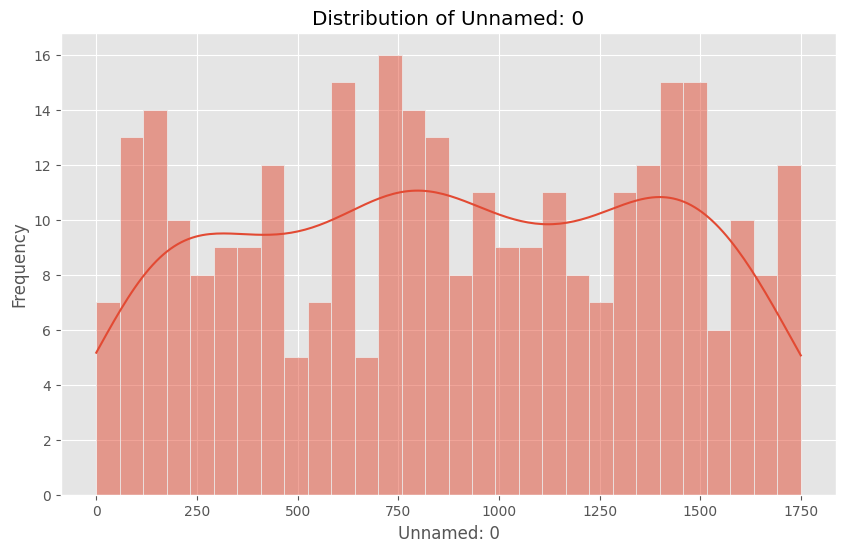

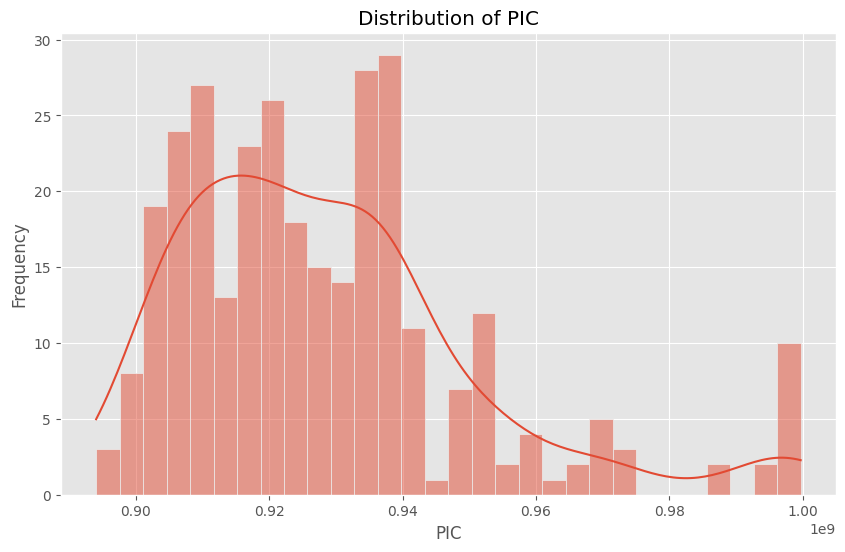

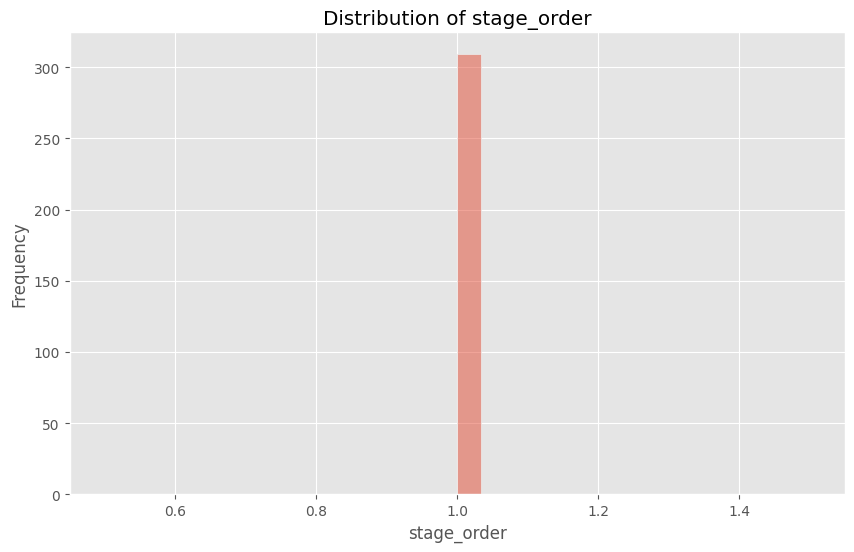

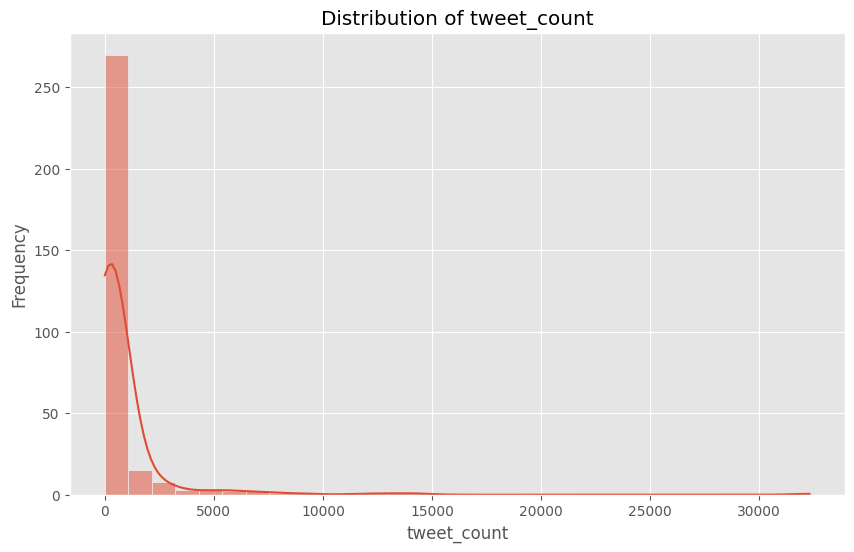

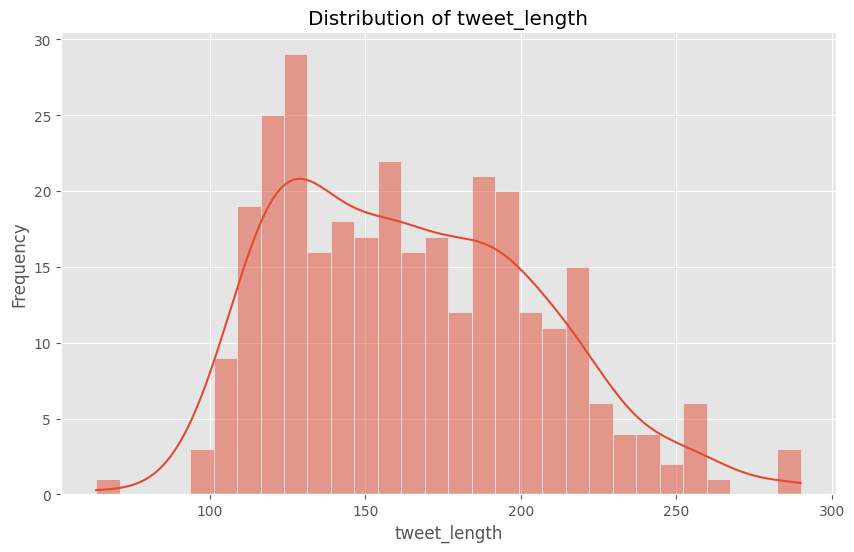

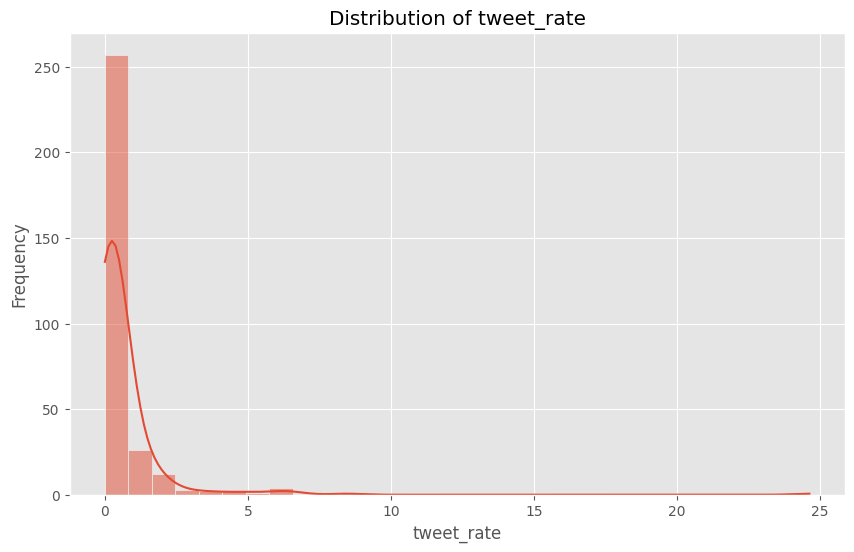

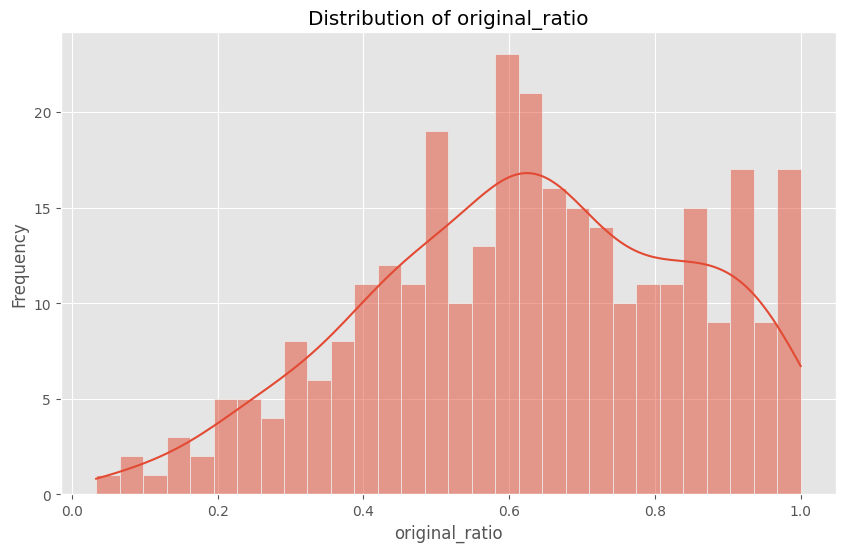

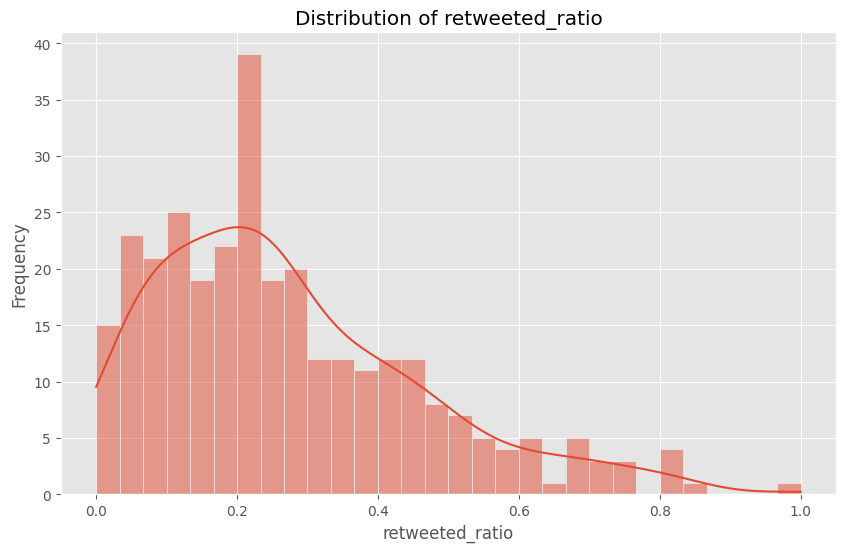

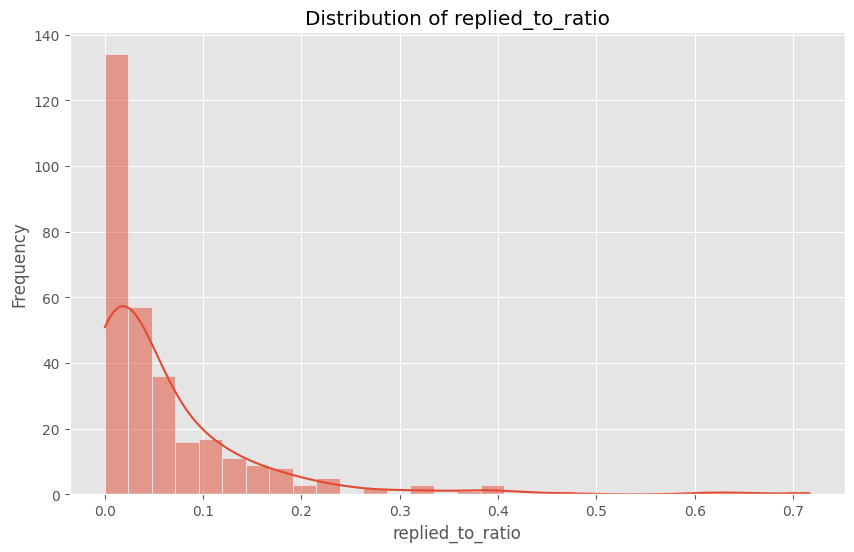

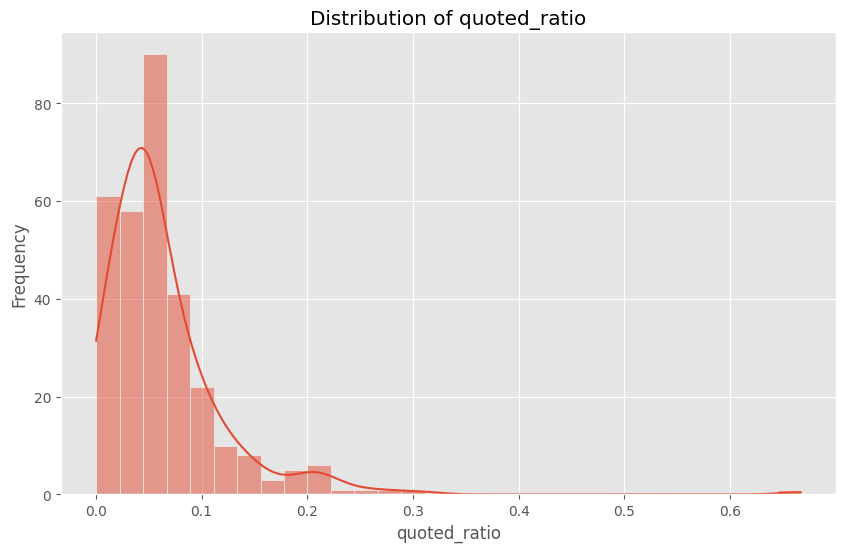

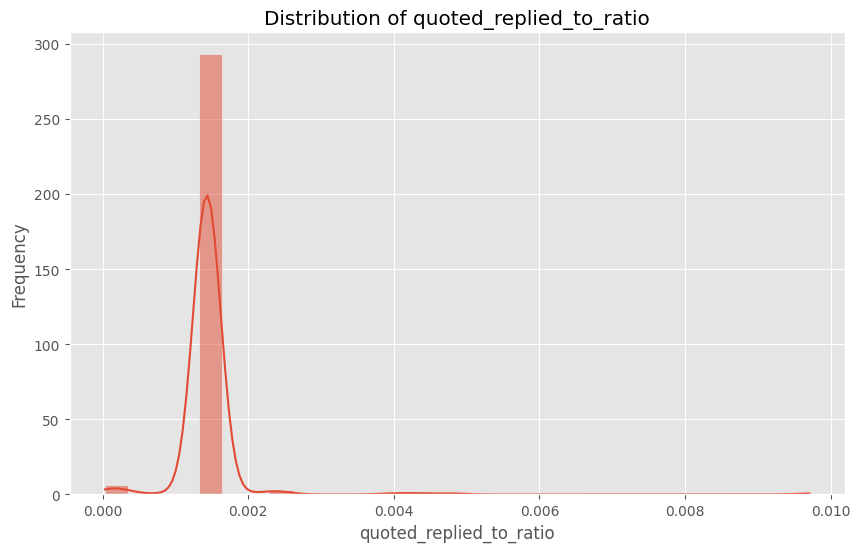

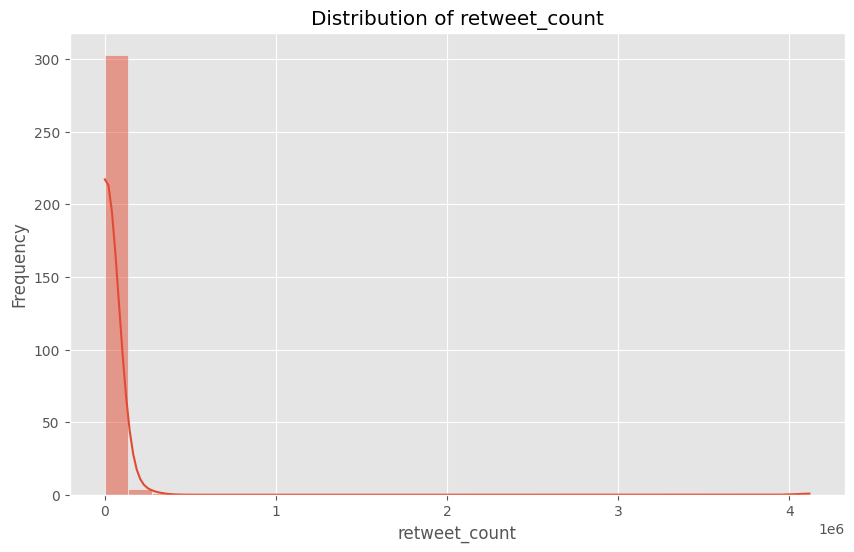

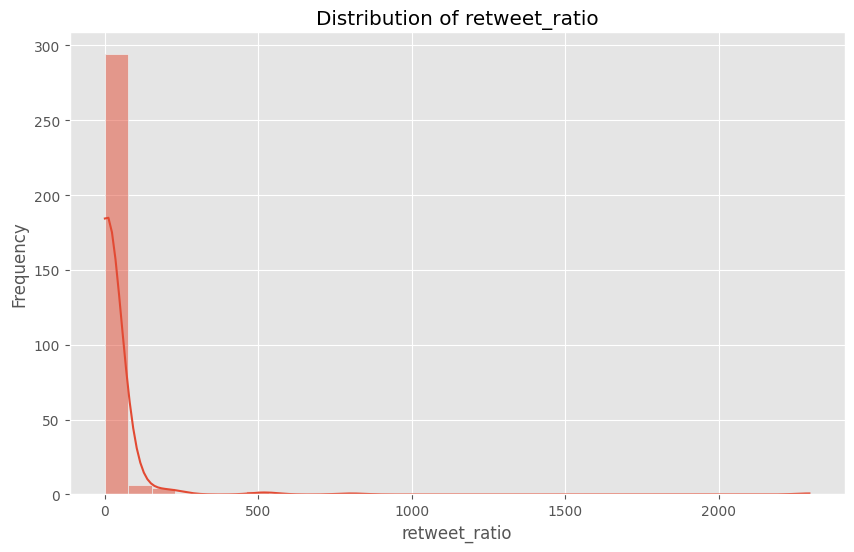

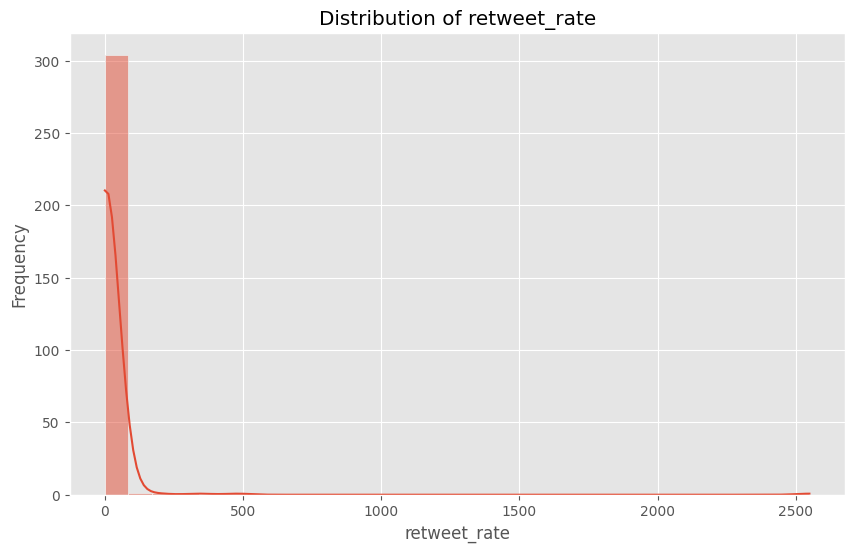

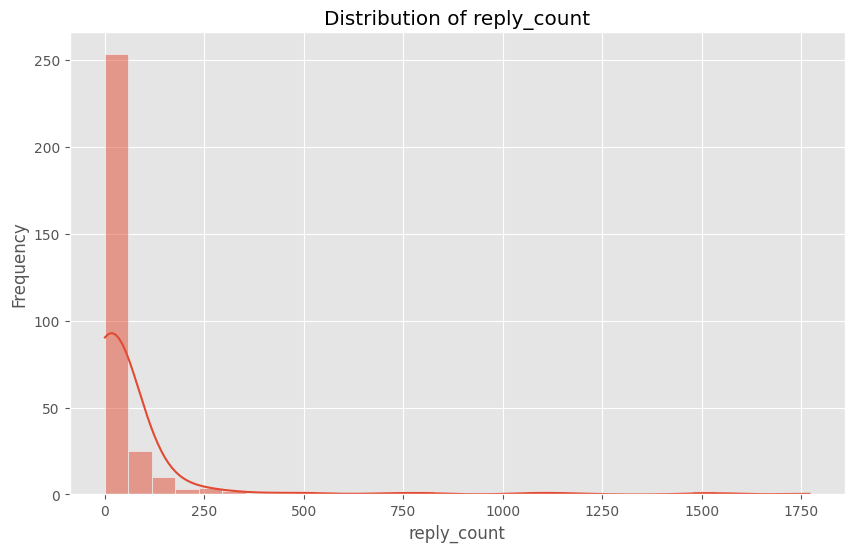

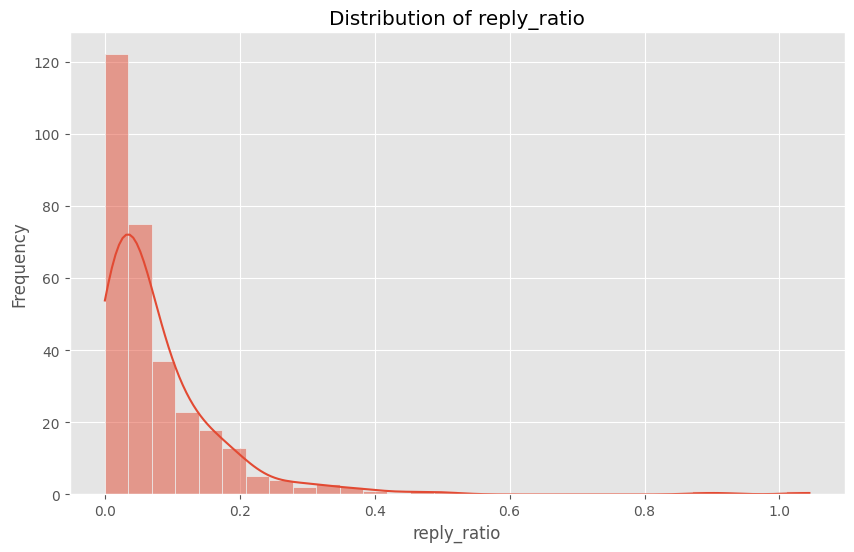

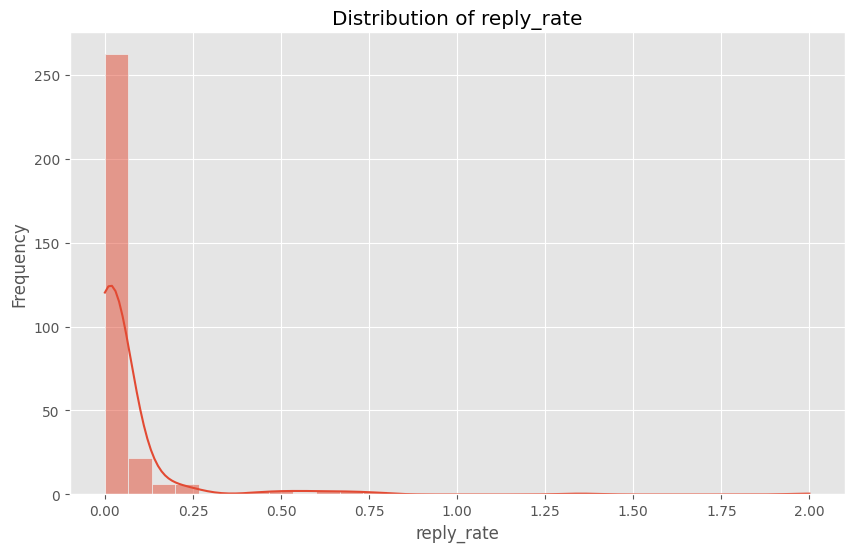

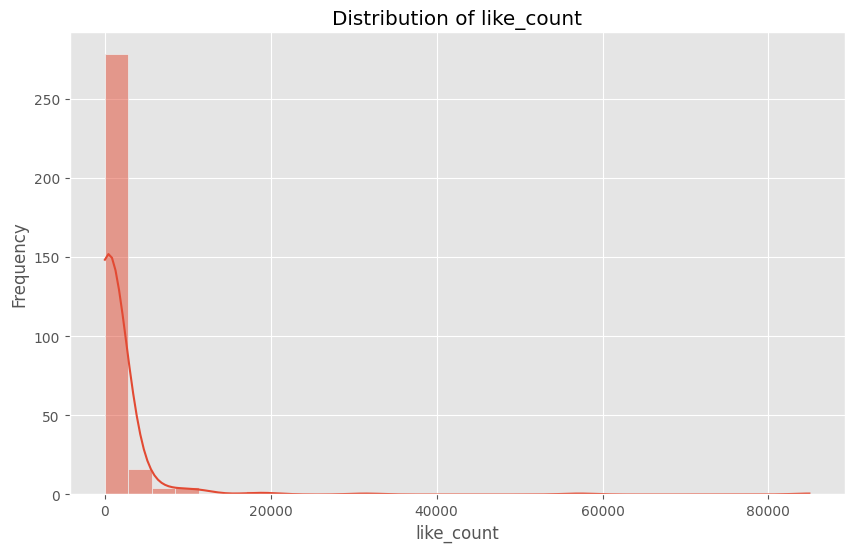

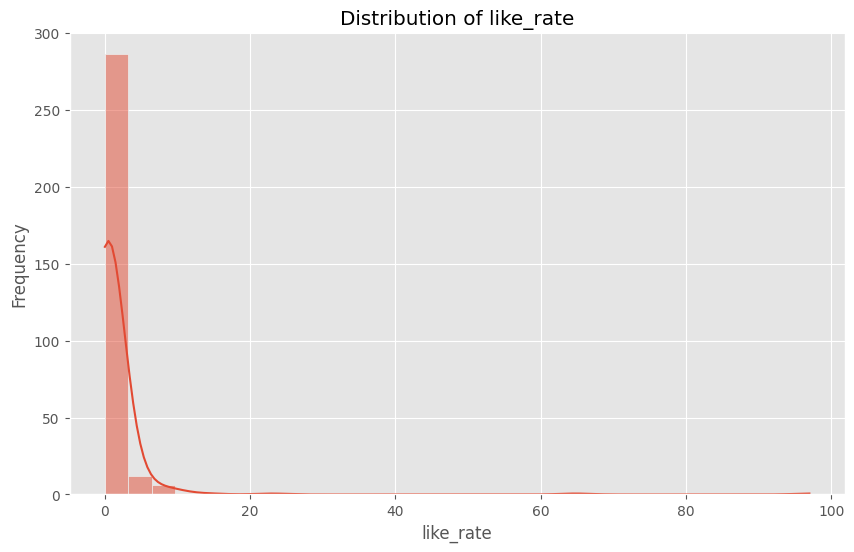

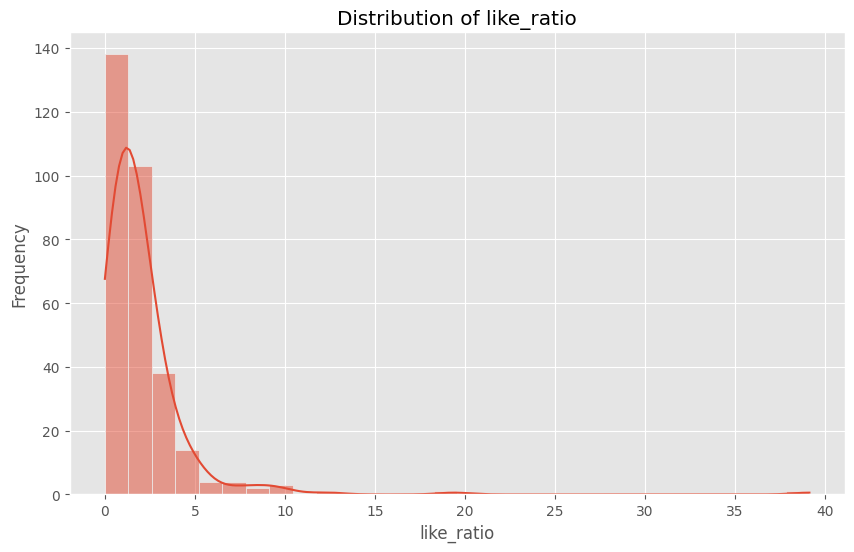

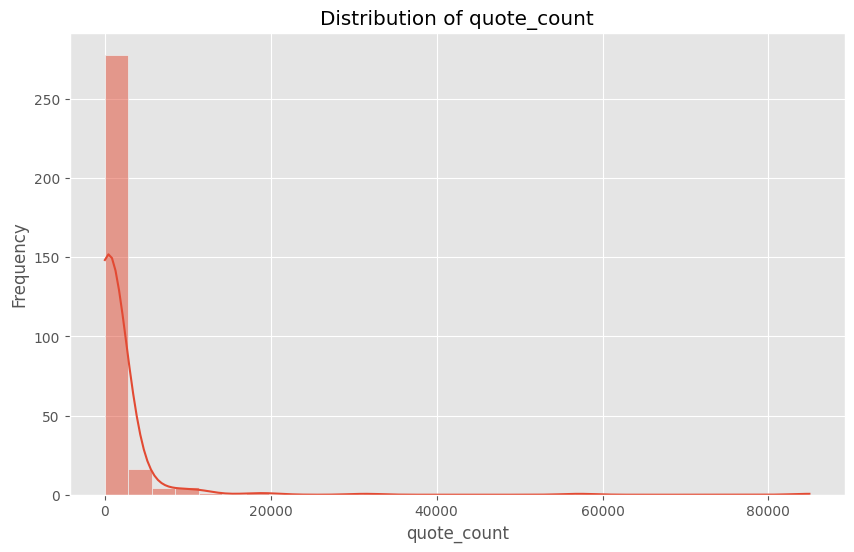

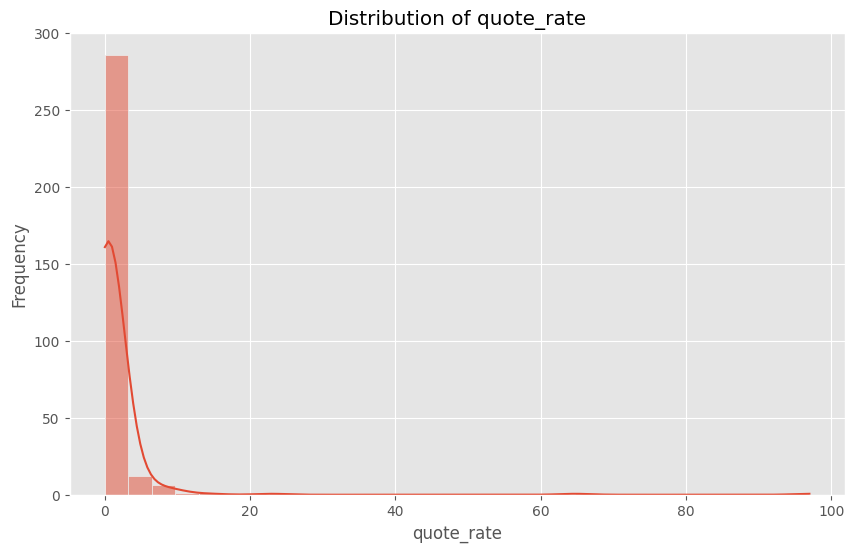

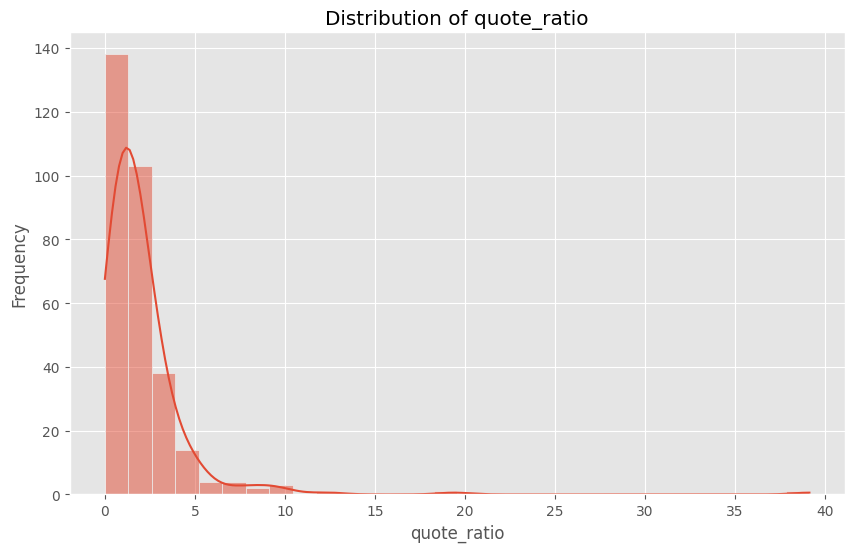

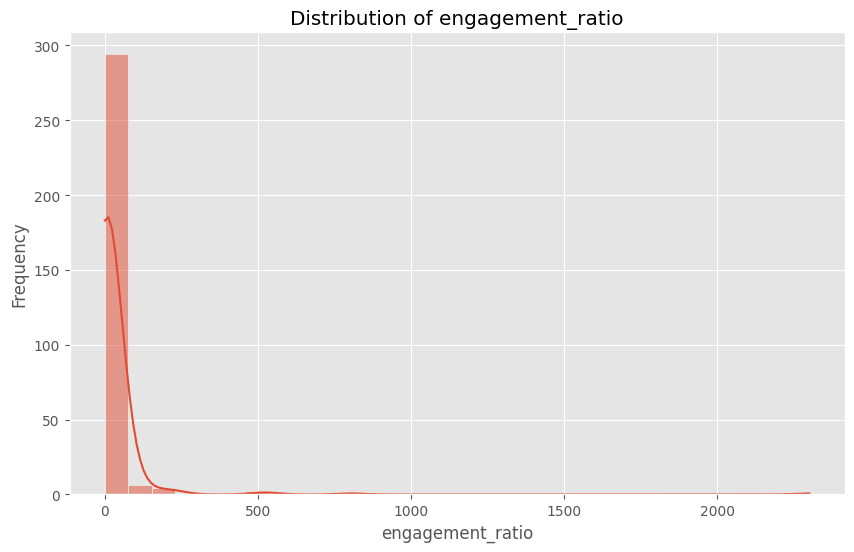

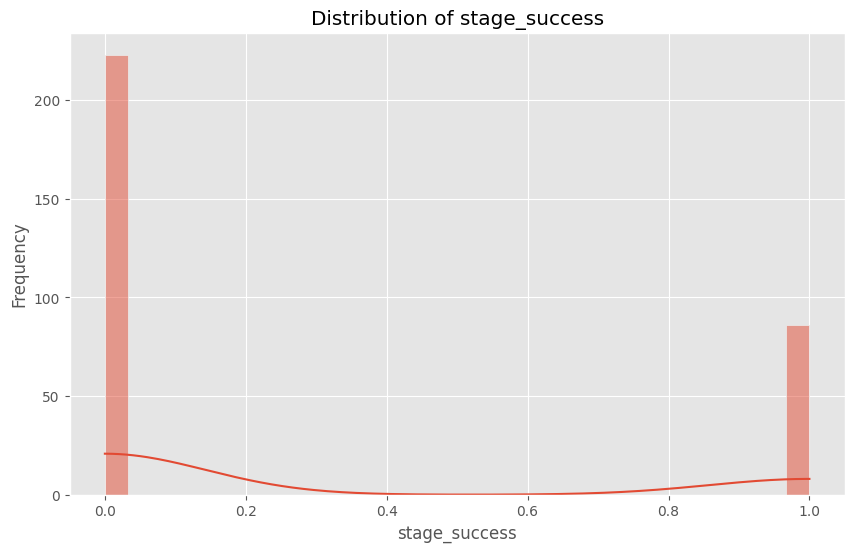

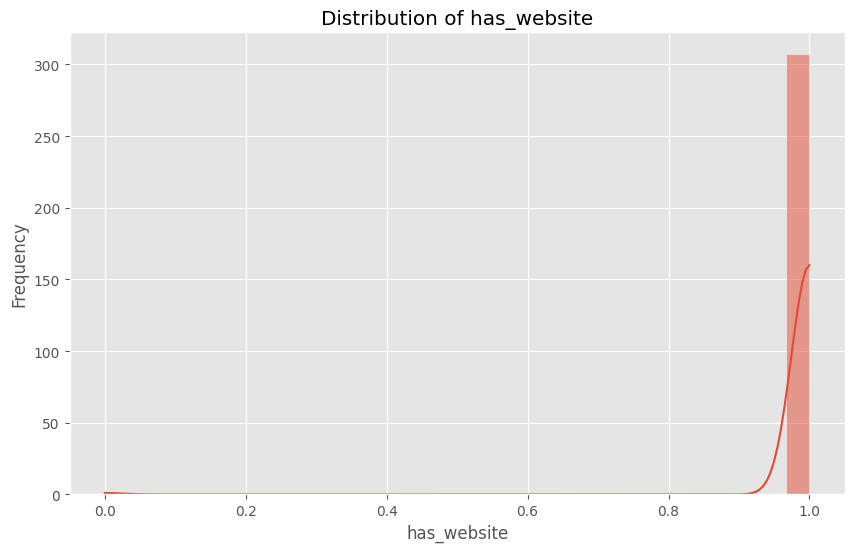

In [77]:
numeric_columns = df.select_dtypes(include='number').columns

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### **Understanding numerical columns relationship with Target**

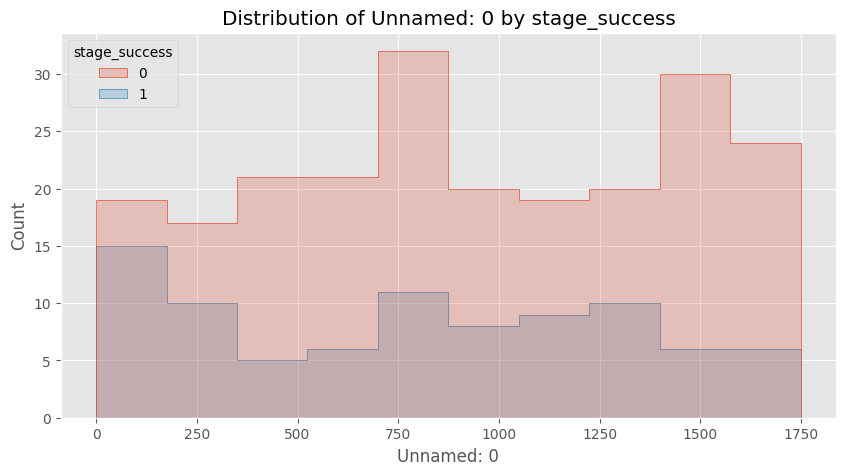

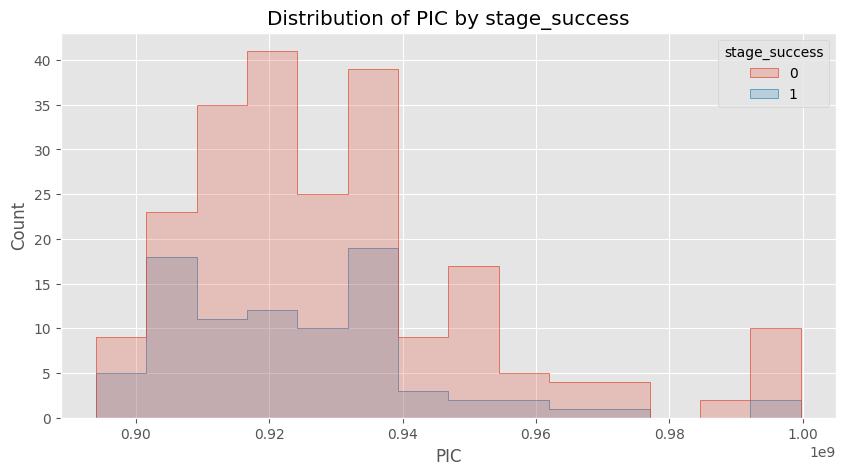

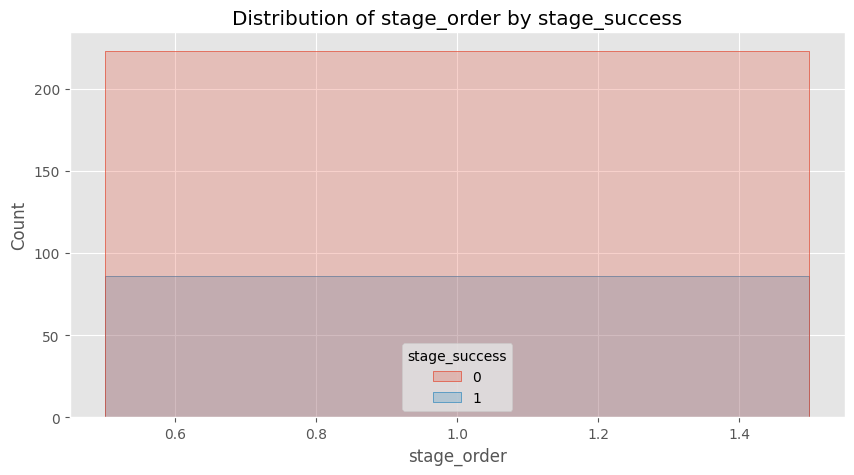

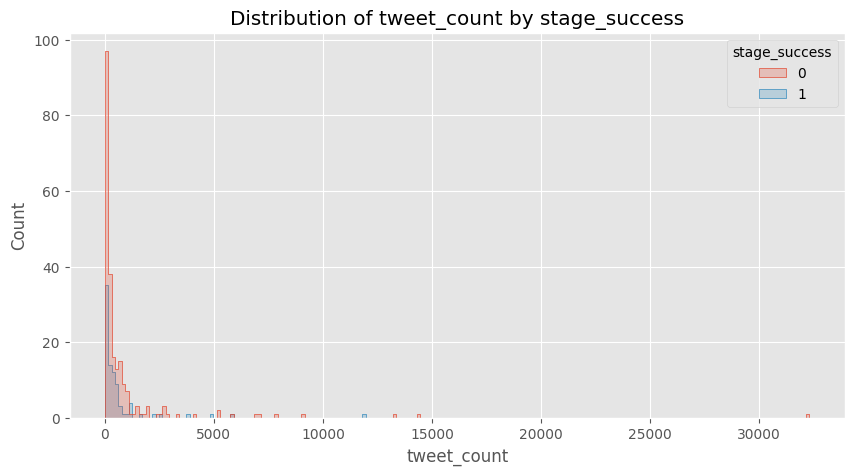

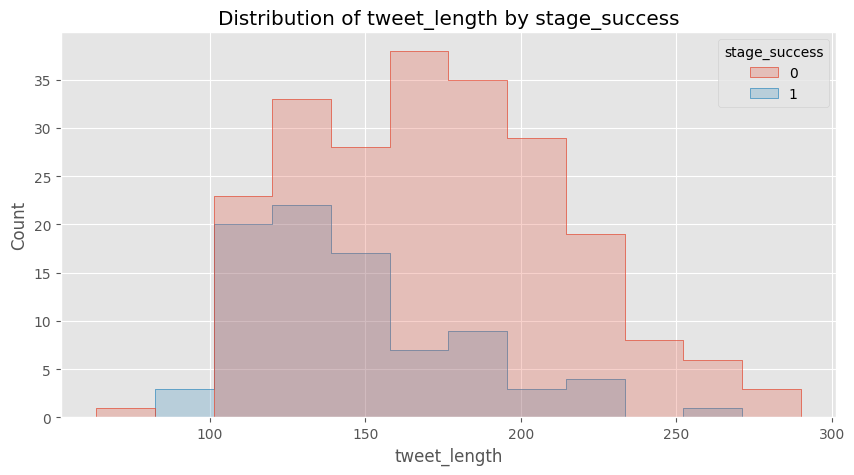

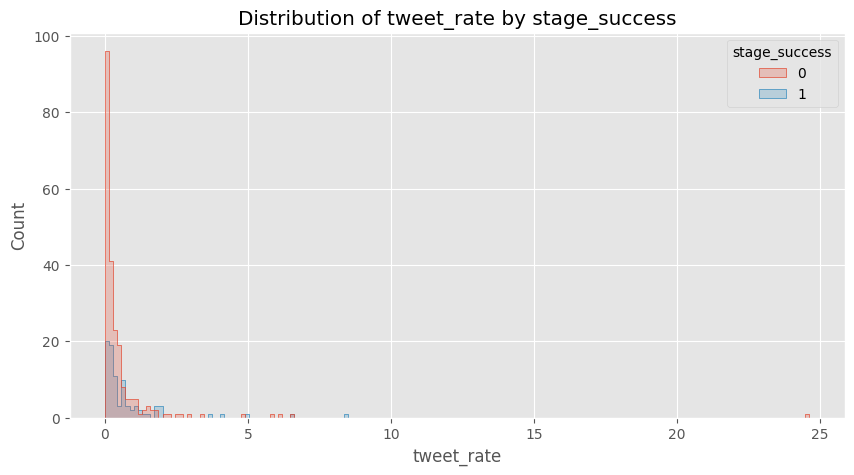

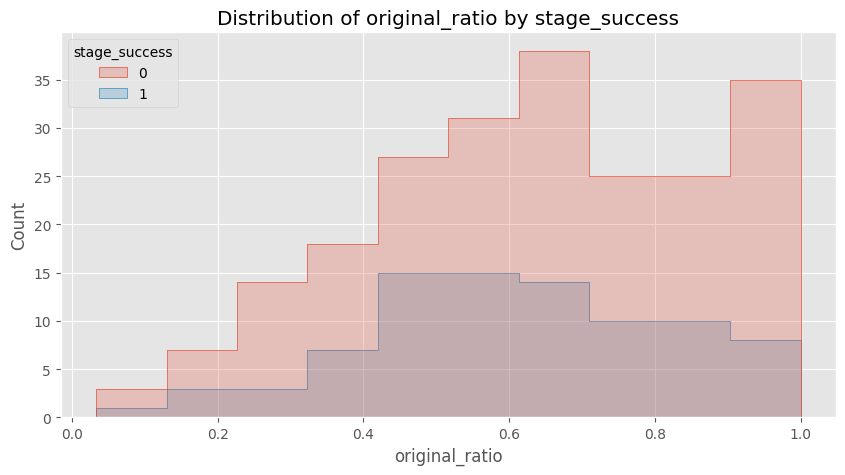

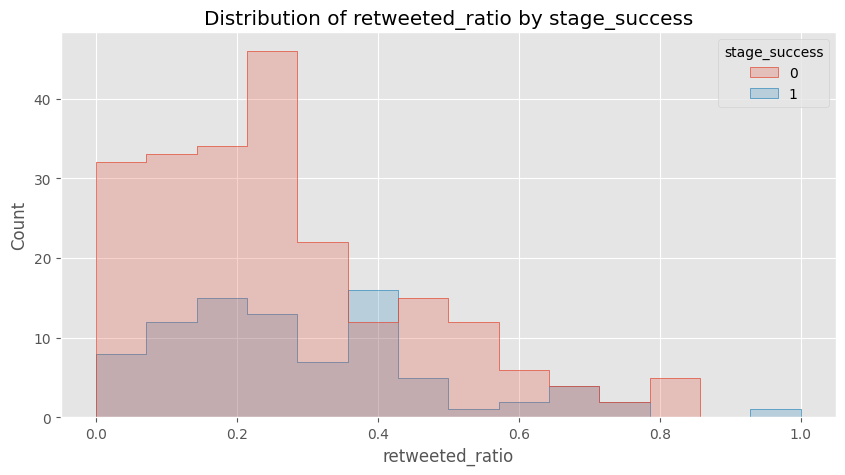

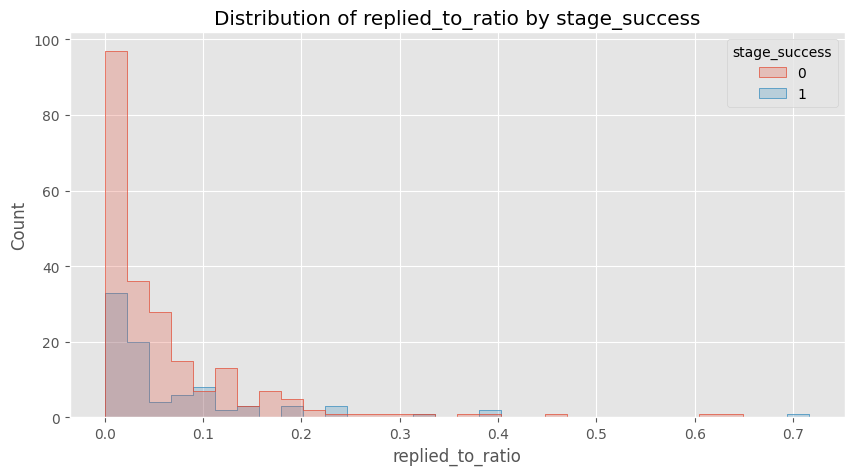

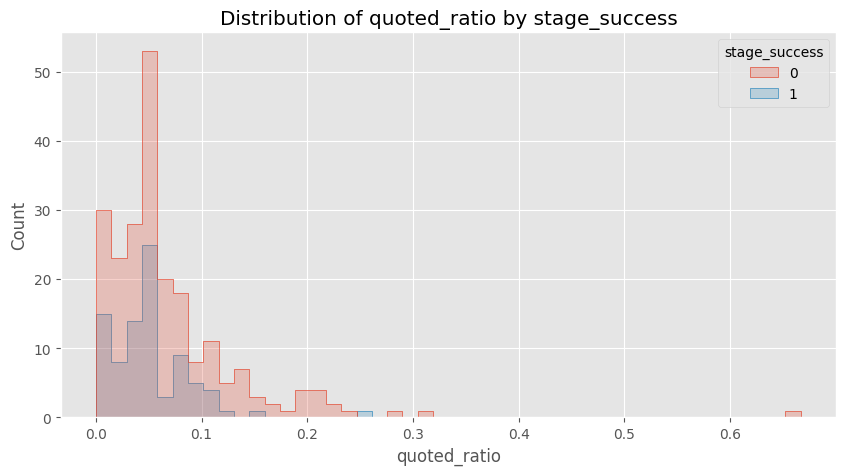

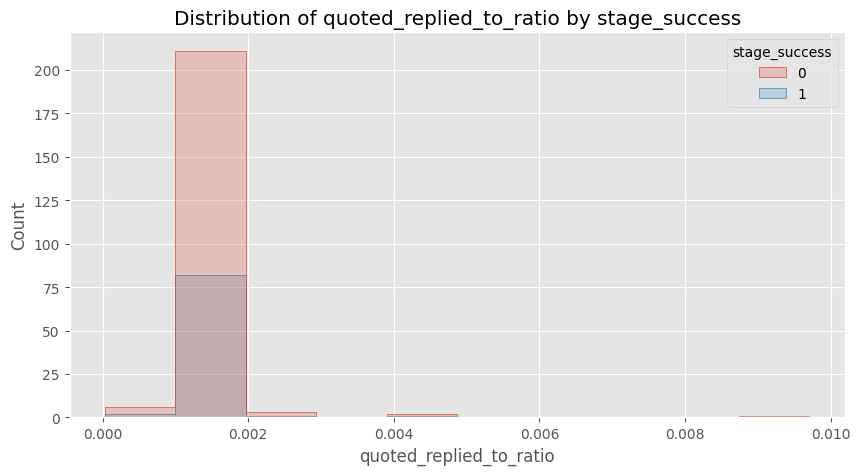

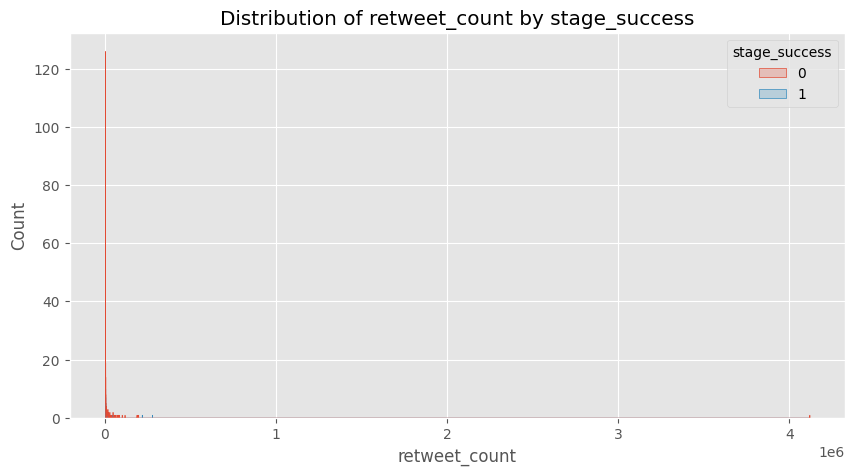

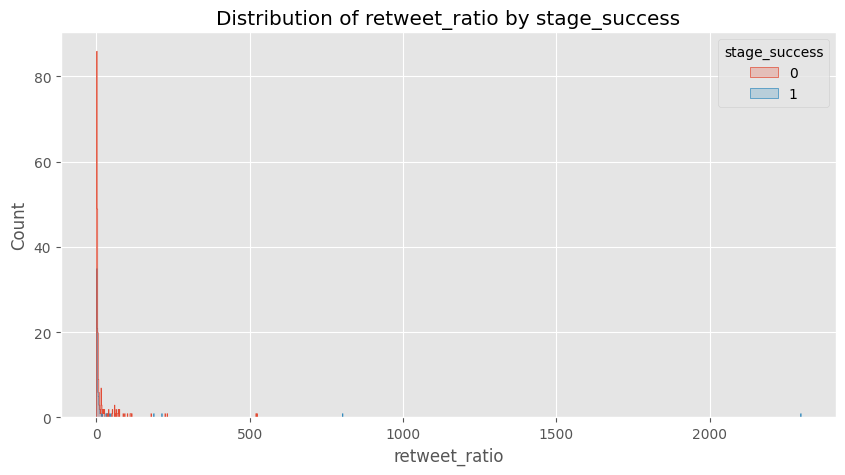

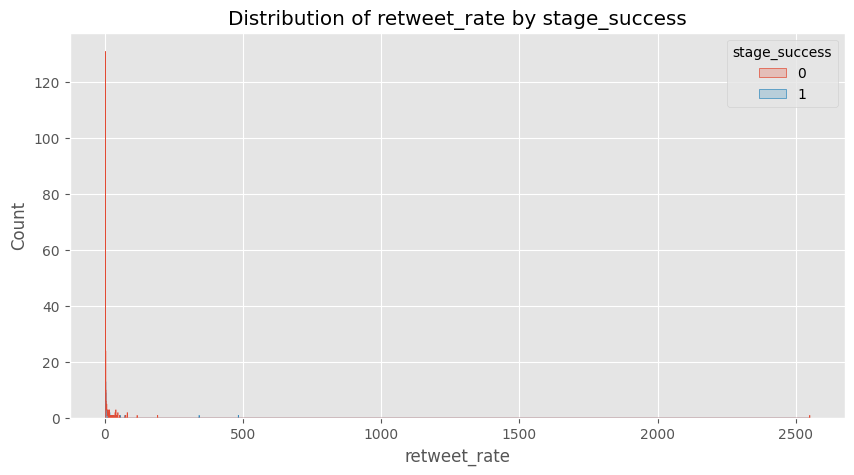

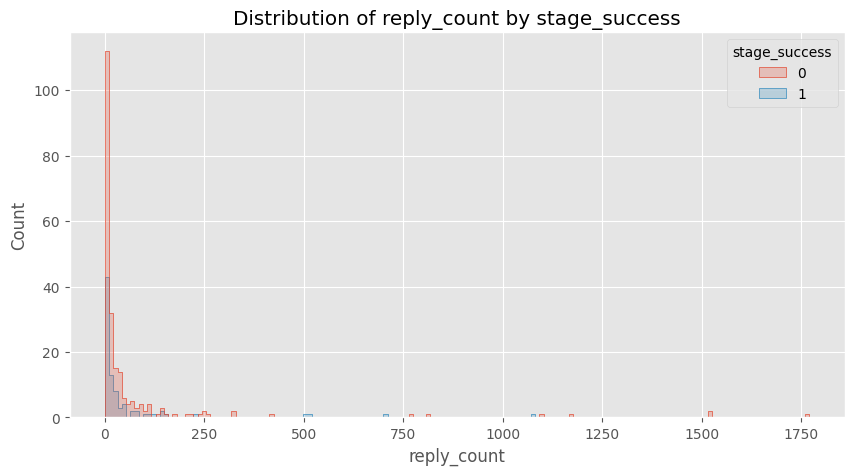

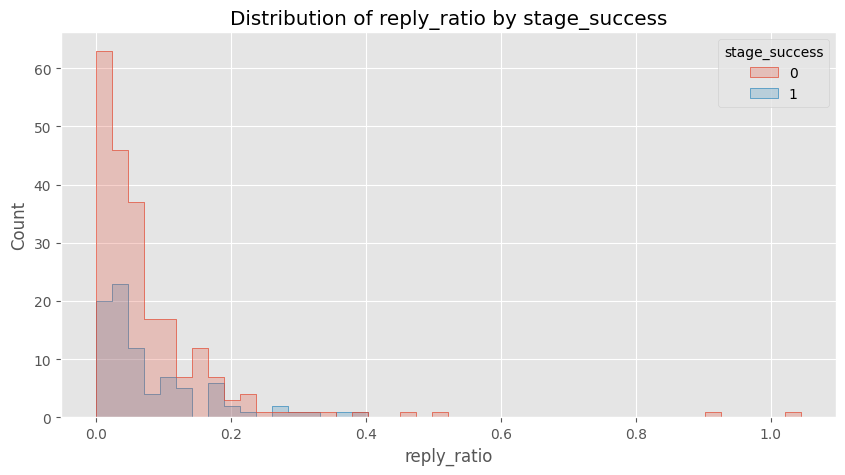

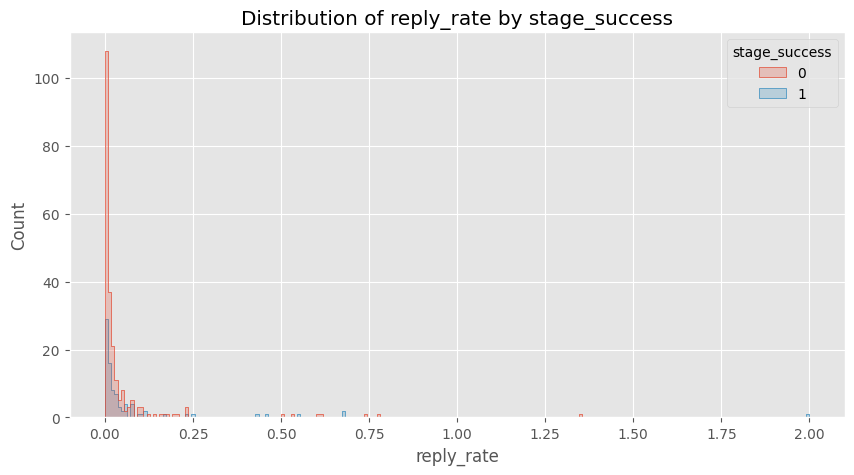

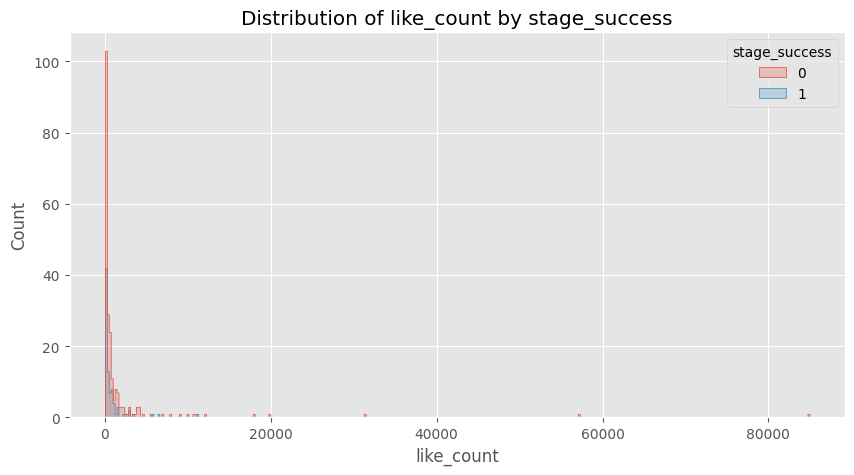

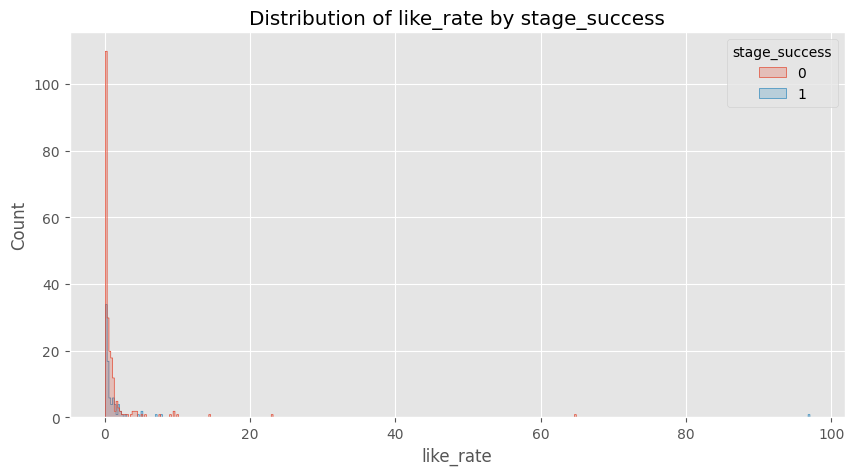

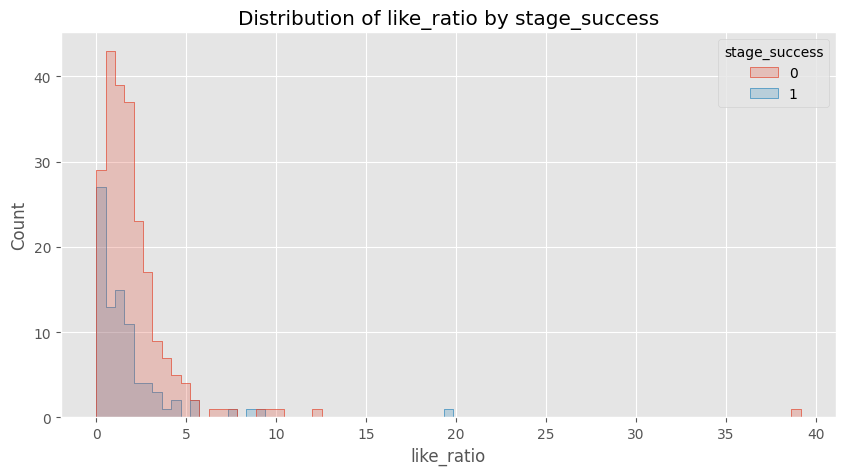

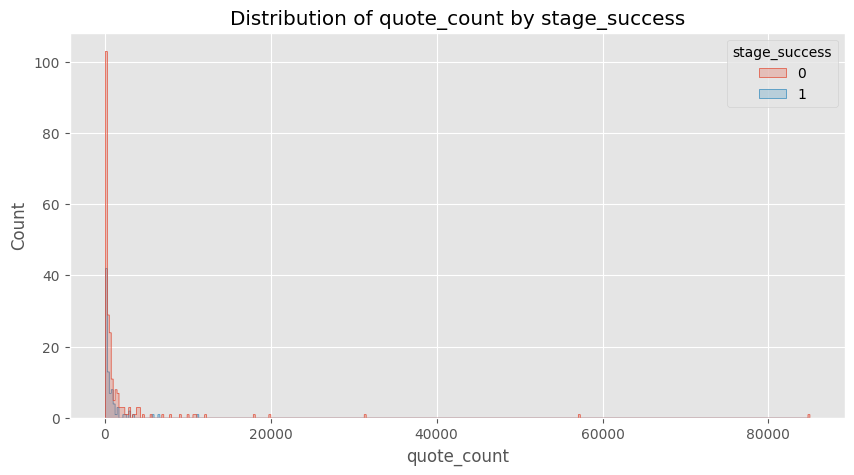

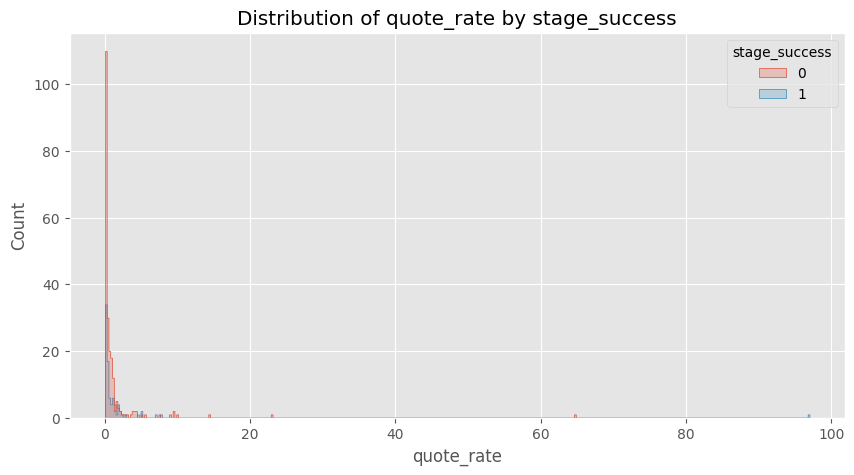

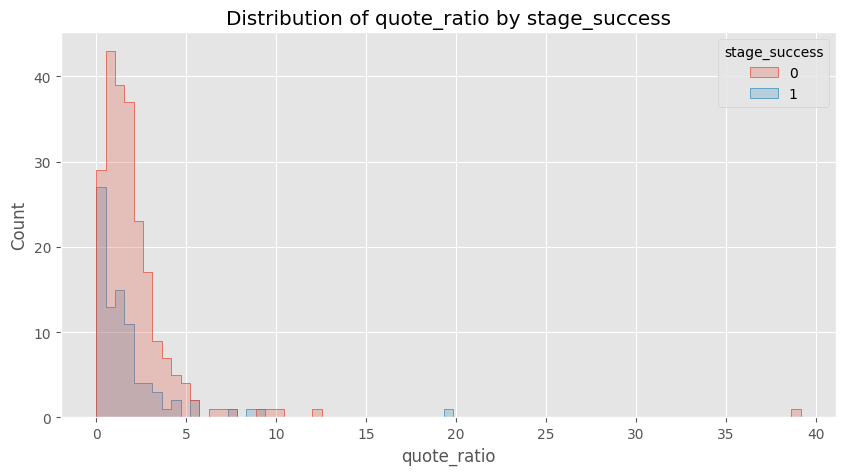

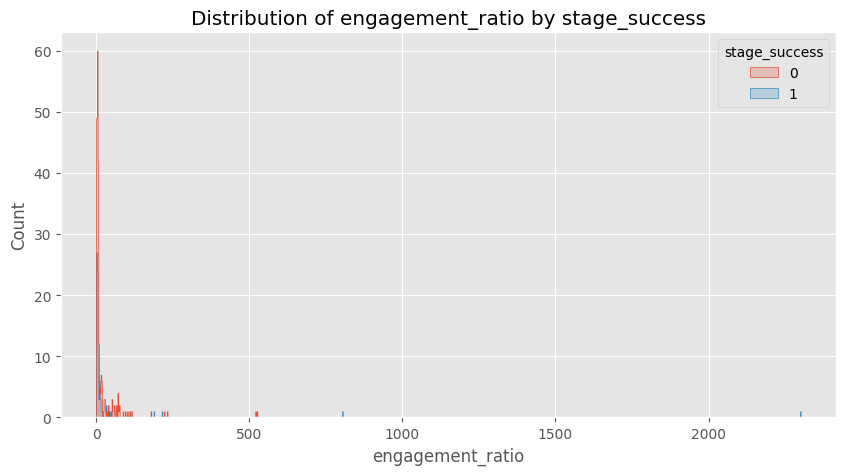

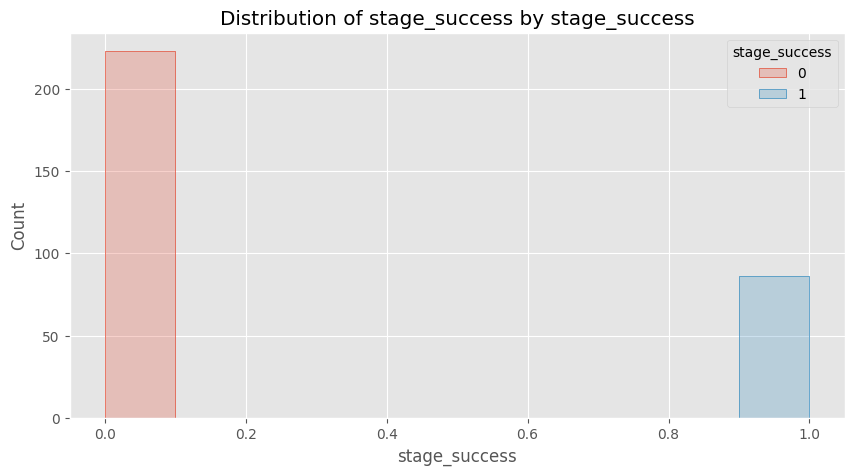

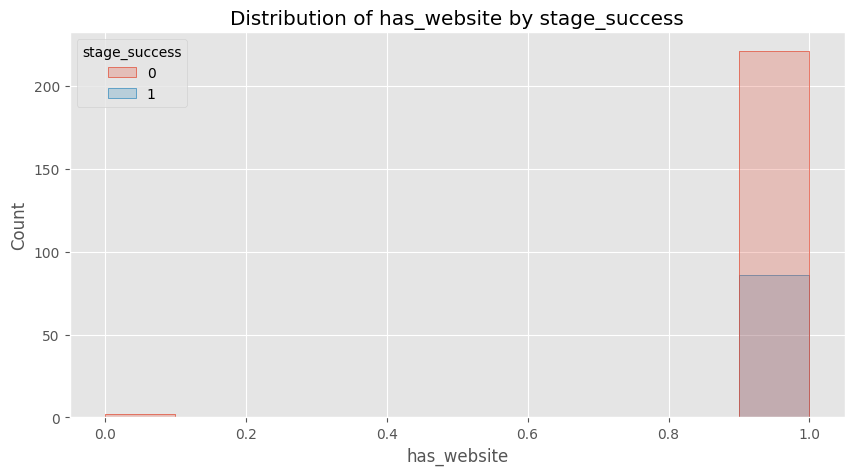

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

for i in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df, x=i, hue="stage_success", element="step", common_norm=False)
    plt.title(f"Distribution of {i} by stage_success")
    plt.show()

As seen most of the variables do not have a normal distribution thus we will use a min max scaler


### **Splitting the Features and Labels**

In [79]:
X = df_encoded.drop(columns=['stage_success', 'Unnamed: 0', 'PIC'])
y = df_encoded['stage_success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

We are going to drop both 'Unnamed: 0' and 'PIC' variables as they are meaningless and might add some noise and disturb the models. However, we consider the startup 'name' to be relevant as some VCs could even decide not to invest in a company if its name is ridiculous. There is proved psychology behind company names.

### **Scaling the Data with a MinMaxScaler**

In [80]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Checking for Imbalances in the Data**

In [81]:
class_distribution = y.value_counts(normalize=True)
print("Class Distribution:")
print(class_distribution)

Class Distribution:
stage_success
0    0.721683
1    0.278317
Name: proportion, dtype: float64


In [82]:
smote = SMOTE(random_state=1)

X_train, y_train = smote.fit_resample(X_train, y_train)

print("Class distribution after resampling:", y_train.value_counts().to_dict())

Class distribution after resampling: {0: 174, 1: 174}


Models to try: Logistic Regression, Gradient Boosting, Random Forest Classifier, and Decision Tree Classifier.

<br>

# **Decision Tree Model**

[Text(0.5, 0.875, 'tweet_length <= 0.399\ngini = 0.5\nsamples = 348\nvalue = [174, 174]'),
 Text(0.25, 0.625, 'like_count <= 0.016\ngini = 0.429\nsamples = 186\nvalue = [58, 128]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'tweet_rate <= 0.002\ngini = 0.381\nsamples = 168\nvalue = [43, 125]'),
 Text(0.0625, 0.125, 'gini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.1875, 0.125, 'gini = 0.32\nsamples = 155\nvalue = [31, 124]'),
 Text(0.375, 0.375, 'name_SHERPA EUROPE SL <= 0.053\ngini = 0.278\nsamples = 18\nvalue = [15, 3]'),
 Text(0.3125, 0.125, 'gini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.625, 'like_rate <= 0.01\ngini = 0.407\nsamples = 162\nvalue = [116, 46]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'city_AMSTERDAM <= 0.046\ngini = 0.273\nsamples = 104\nvalue = [87, 17]'),
 Text(0.5625, 0.125, 'gini = 0.213\nsamples = 99\nvalue = [87, 12]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsam

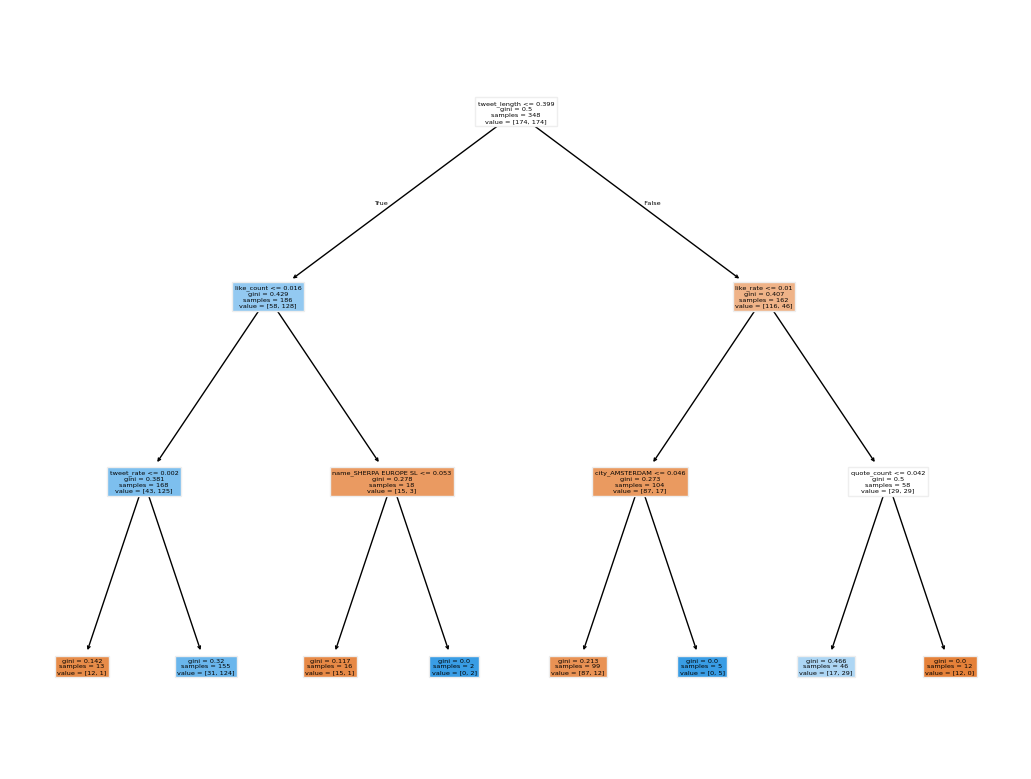

In [83]:
tree = DecisionTreeClassifier(max_depth=3, random_state=1)
tree.fit(X_train, y_train)
plt.figure(dpi=200)
plot_tree(tree, feature_names=X.columns, filled=True)

In [84]:
dt = DecisionTreeClassifier(random_state=1)

scores = cross_val_score(dt, X_train, y_train, cv=10)
print("Scores Mean: ", scores.mean())

Scores Mean:  0.813781512605042


### **Max_Depth Param**

Text(0.5, 0, 'max_depth')

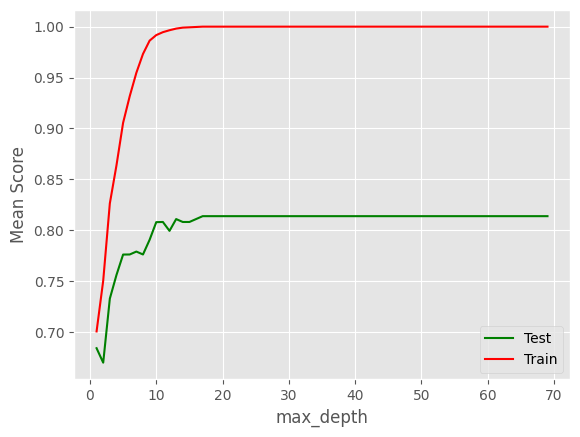

In [85]:
param_grid = {'max_depth':range(1, 70)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid=param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
ax = sns.lineplot(data=scores, x='param_max_depth', y='mean_test_score', color='green', label='Test')
sns.lineplot(data=scores, x='param_max_depth', y='mean_train_score', color='red', label='Train')
ax.set_ylabel('Mean Score')
ax.set_xlabel('max_depth')

In [86]:
print("Best Params: ", grid.best_params_)
print("Best Score: ", grid.best_score_)

Best Params:  {'max_depth': 17}
Best Score:  0.813781512605042


### **Max Lead Node Param**

Text(0.5, 0, 'max_leaf_nodes')

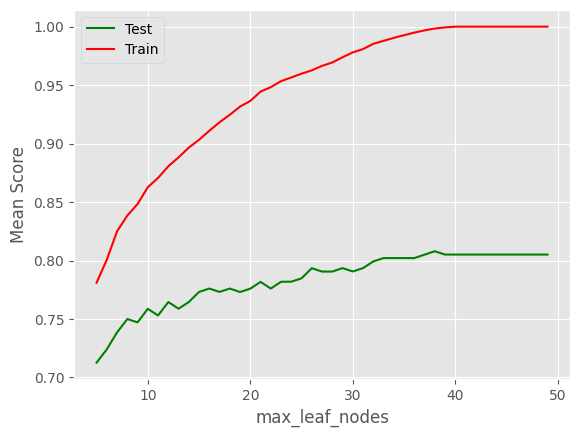

In [87]:
param = 'max_leaf_nodes'
param_grid = {param:range(5, 50)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid=param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
ax = sns.lineplot(data=scores, x='param_'+param, y='mean_test_score', color='green', label='Test')
sns.lineplot(data=scores, x='param_'+param, y='mean_train_score', color='red', label='Train')
ax.set_ylabel('Mean Score')
ax.set_xlabel(param)

In [88]:
print("Best Params: ", grid.best_params_)
print("Best Score: ", grid.best_score_)

Best Params:  {'max_leaf_nodes': 38}
Best Score:  0.807983193277311


### **Parameter Combination Tunning**

In [89]:
param_grid = {
    'max_depth': range(2, 30,2),
    'max_leaf_nodes': range(10, 50,2),
    'min_samples_split': range(2, 20)
}


grid = GridSearchCV(
    DecisionTreeClassifier(random_state=1),
    param_grid=param_grid,
    cv=5,
    return_train_score=True,
    n_jobs=-1)


grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': range(2, 30, 2),
                         'max_leaf_nodes': range(10, 50, 2),
                         'min_samples_split': range(2, 20)},
             return_train_score=True)

In [90]:
print("Best Params: ", grid.best_params_)
print("Best Score: ", grid.best_score_)

Best Params:  {'max_depth': 12, 'max_leaf_nodes': 34, 'min_samples_split': 2}
Best Score:  0.8103105590062112


### **Training the Model with the best Params**

In [91]:
grid.best_params_



{'max_depth': 12, 'max_leaf_nodes': 34, 'min_samples_split': 2}

In [92]:
tree = DecisionTreeClassifier(**grid.best_params_, random_state=1)
tree.fit(X_train, y_train)
display(tree.score(X_test, y_test))

0.6666666666666666

In [93]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': None,
 'max_leaf_nodes': 34,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 1,
 'splitter': 'best'}

In [94]:
print("Best Params: ", grid.best_params_)
print("Best Score: ", grid.best_score_)

Best Params:  {'max_depth': 12, 'max_leaf_nodes': 34, 'min_samples_split': 2}
Best Score:  0.8103105590062112


In [95]:
y_pred_tree = tree.predict(X_test)

print(metrics.classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.70      0.82      0.75        49
           1       0.57      0.41      0.48        29

    accuracy                           0.67        78
   macro avg       0.64      0.62      0.62        78
weighted avg       0.65      0.67      0.65        78



<br>

# GRADIENT BOOSTING MODEL

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier(random_state=1)
GBC.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [97]:
print("Test score:", GBC.score(X_test, y_test))

Test score: 0.7435897435897436


In [98]:
GBC_CV_SC= cross_val_score(GBC,X_train, y_train, cv=10, n_jobs=-1).mean()
print("Cross Validation Score:", GBC_CV_SC)

Cross Validation Score: 0.8595798319327731


Now we will try to find the best parameters, and see how this ideal model behaves with unseen data (test set).


In [99]:
param_grid={
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1]
    }

In [100]:
from sklearn.model_selection import GridSearchCV


In [101]:
gbr2=GridSearchCV(GBC, param_grid, cv=10, n_jobs=-1)

In [102]:
gbr2.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [103]:
print('Best score:',gbr2.best_score_)
print('Best Parameters:',gbr2.best_params_)

Best score: 0.8970588235294118
Best Parameters: {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 300}


In [104]:
params={'learning_rate': 1, 'max_depth': 5, 'n_estimators': 300}

In [105]:
GBC1=GradientBoostingClassifier(**params, random_state=1)
GBC1.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=5, n_estimators=300,
                           random_state=1)

In [106]:
print("Test score:", GBC1.score(X_test, y_test))
print('Cross Validation Score:',gbr2.best_score_)
print('Final Model: GBC1')
print('Model parameters:', gbr2.best_params_)

Test score: 0.717948717948718
Cross Validation Score: 0.8970588235294118
Final Model: GBC1
Model parameters: {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 300}


In [107]:
y_pred_GBC1= GBC1.predict(X_test)

print(metrics.classification_report(y_test, y_pred_GBC1))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        49
           1       0.77      0.34      0.48        29

    accuracy                           0.72        78
   macro avg       0.74      0.64      0.64        78
weighted avg       0.73      0.72      0.68        78



<br>

## Random Forest Classifier

#### Basic Model

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [109]:
rf = RandomForestClassifier(random_state=1, class_weight='balanced')
rf.fit(X_train, y_train)


print("Test score:", rf.score(X_test, y_test))

Test score: 0.7307692307692307


Cross-validation score for the basic model

In [110]:
rf_cross = cross_val_score(rf, X_train, y_train, cv=10, n_jobs=-1).mean()
print("Cross Validation Score:", rf_cross)

Cross Validation Score: 0.8881512605042017


In [111]:
y_pred_rf_basic = rf.predict(X_test)

print(metrics.classification_report(y_test, y_pred_rf_basic))

              precision    recall  f1-score   support

           0       0.71      0.98      0.82        49
           1       0.90      0.31      0.46        29

    accuracy                           0.73        78
   macro avg       0.80      0.64      0.64        78
weighted avg       0.78      0.73      0.69        78



Hyperparmeter Tuning

In [112]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 3]
}


rf_grid = GridSearchCV(rf, param_grid, cv=10, n_jobs=-1, scoring='precision')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='precision')

In [113]:
print('Best score:', rf_grid.best_score_)
print('Best Parameters:', rf_grid.best_params_)

Best score: 0.9200833158070001
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


Final Random Forest Classifier with best parameters

In [114]:
best_params = rf_grid.best_params_
rf_best = RandomForestClassifier(**best_params, random_state=1, class_weight='balanced')
rf_best.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_split=5, n_estimators=300, random_state=1)

In [115]:
print("Test score:", rf_best.score(X_test, y_test))
print("Cross Validation Score:", rf_grid.best_score_)

Test score: 0.717948717948718
Cross Validation Score: 0.9200833158070001


The model with the best hyperparameters had an average precision of 92% across 10 CV folds on the training data. (Slightly better tham the default model)

Now, let's try the model on test data:

In [116]:
y_pred_rf = rf_best.predict(X_test)

print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        49
           1       0.77      0.34      0.48        29

    accuracy                           0.72        78
   macro avg       0.74      0.64      0.64        78
weighted avg       0.73      0.72      0.68        78



**Metrics haven't improved**. Even if the default values are in the grid, **GridSearchCV might have picked another combination that did better in training CV folds, but not on real test data.**

That’s why the test precision might have dropped that much from 90% in the basic model, to 77% in the theoretically optimized one. This doesn’t mean the model or tuning is broken, it just reflects variance, overfitting, and the limits of CV.

Although, Recall and F1 Score might have improved a little bit, it isn't enough upgrade compared to the huge decrease in Precision, and reduction in overall accuracy. Therefore, in this case, **we are going to keep the basic/default model settings** to predict startup success.

<br>



## Logistic Regression

In [117]:
model = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=1)

In [118]:
y_pred_logreg = model.predict(X_test)
y_pred_proba_logreg = model.predict_proba(X_test)[:, 1]

In [119]:
metrics.accuracy_score(y_test, y_pred_logreg)

0.6538461538461539

In [120]:
print(metrics.classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75        49
           1       0.56      0.34      0.43        29

    accuracy                           0.65        78
   macro avg       0.62      0.59      0.59        78
weighted avg       0.64      0.65      0.63        78



<br>

<br>

## Best Model Selection

The **objective** of this project is to build a model, which would be implemented by a Venture Capital firm (VC), to **determine the success likelihood of startups** based on some basic features, such as the country and city they belong to, and other interesting data gathered using Twitter (now, X), such as 'tweet_length', 'retweet count', etc.

Therefore, **thinking as a VC, the most costly output of the 4 possible model's outputs (TP, TN, FP, FN), is getting a False Positive (FP)**, as the firm would be investing in a failing company. **Therefore**, to minimize this output, **we must focus on the models' Precision**.

**However, the nature of VC firms is to be risky** (controlled risk), assuming that they would be failing in most of their investment, but that investment exposure would allow them to be part of a really big and massively successful company that drives their profits. **Thus, to have a bit more of exposure to risk and invest in a larger number of companies to increase the probabilities of hitting the jackpot, we could use a different performance metric to analyze the models**.

In this case, the **F-1 score**, which is the **harmonic mean of both Recall and Precision**, must **give a more balanced risk exposure than just relying on Precision**, which might be too conservative.

$$
F_1 = 2 \cdot \frac{{\text{Precision} \cdot \text{Recall}}}{{\text{Precision} + \text{Recall}}}
$$
<br>

Let's check for the models' F-1 Score:

In [121]:
print(f' F-1 Score for Decision Tree Classifier: {metrics.f1_score(y_test, y_pred_tree)}')
print(f' F-1 Score for Gradient Boosting: {metrics.f1_score(y_test, y_pred_GBC1)}')
print(f' F-1 Score for Random Forest Classifier: {metrics.f1_score(y_test, y_pred_rf)}')
print(f' F-1 Score for Logistic Regression: {metrics.f1_score(y_test, y_pred_logreg)}')


 F-1 Score for Decision Tree Classifier: 0.48
 F-1 Score for Gradient Boosting: 0.47619047619047616
 F-1 Score for Random Forest Classifier: 0.47619047619047616
 F-1 Score for Logistic Regression: 0.425531914893617


They are **all very similar and low**. We consider that they are **not comparable based on this metric**, and even if we chose the highest one, the score is quite low, and it won't yield desirable results.

**Let's try with Precision instead**, a conservative, safe and rational investment criterion:

In [122]:
print(f' Precision Score for Decision Tree Classifier: {metrics.precision_score(y_test, y_pred_tree)}')
print(f' Precision Score for Gradient Boosting: {metrics.precision_score(y_test, y_pred_GBC1)}')
print(f' Precision Score for Random Forest Classifier: {metrics.precision_score(y_test, y_pred_rf_basic)}')
print(f' Precision Score for Logistic Regression: {metrics.precision_score(y_test, y_pred_logreg)}')

 Precision Score for Decision Tree Classifier: 0.5714285714285714
 Precision Score for Gradient Boosting: 0.7692307692307693
 Precision Score for Random Forest Classifier: 0.9
 Precision Score for Logistic Regression: 0.5555555555555556


Okay, now we have a clear winner, with a very high Precision score of 90%, which is the **Random Forest Classifier** model.

<br>

Why might have the random Forest model performed so good compared to the others?:
- As an ensemble of decision trees, Random Forest reduces overfitting and generalizes well, especially with noisy or varied data like tweet metrics.

- Random feature selection and bootstrapping help avoid bias and capture complex, nonlinear relationships without extensive preprocessing.

- It is very flexible, as it natively handles both numerical and categorical features, unlike models like Logistic Regression that require more preparation.

- It is good with imbalanced data, and performs well in scenarios like startup success prediction, where positive outcomes are rare.

<br>

## Feature Importances - Random Forest Classifier

<Figure size 1000x600 with 0 Axes>

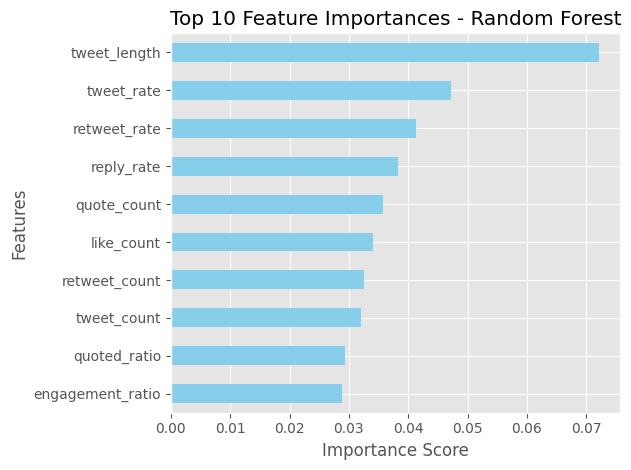

In [123]:
features_importances = pd.DataFrame(rf_best.feature_importances_, index=X.columns, columns=["importance"])
top_10 = features_importances.sort_values(by='importance', ascending=False).head(10)


plt.figure(figsize=(10, 6))
top_10.sort_values(by="importance").plot(kind="barh", legend=False, color='skyblue')
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

Understanding feature importance helps us identify which aspects of startup behavior most influence the model's prediction of success. In this Random Forest model, we can appreciate the following:

- **tweet_length** is the **most important feature**, suggesting that longer tweets may signal better communication strategy or richer content from startups.

- **Engagement rates** (retweet_rate, reply_rate, etc.) **matter more than raw counts**, highlighting the importance of how people respond, not just how much a startup posts.

- **Normalized interaction metrics** like tweet_rate and quoted_ratio **provide a clearer signal of active, ongoing attention from the audience than total volume.**

This feature pattern reinforces the idea that **visibility and meaningful interaction** on social platforms **are strong indicators of startup momentum and success likelihood**.

<br>

## Investment Appraisal

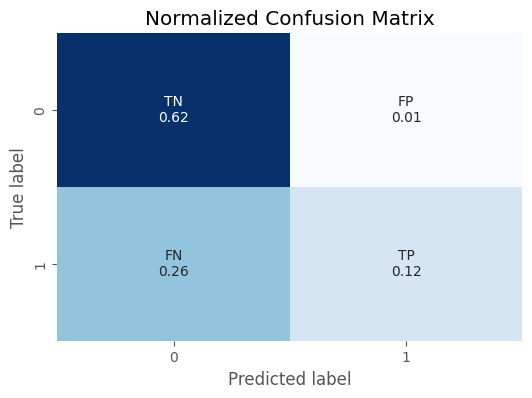

In [124]:
cm = metrics.confusion_matrix(y_test, y_pred_rf_basic)
cm_normalized = cm / np.sum(cm)

labels = np.array([["TN", "FP"], ["FN", "TP"]])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_normalized, annot=labels + "\n" + np.round(cm_normalized, 2).astype(str), fmt="", cmap="Blues", cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Normalized Confusion Matrix")
plt.show()

<u>Monetary Value of each output:</u>

- **True Positive (TP):** +2.500.000€
- **True Negative (TN):** +0€
- **False Positive (FP):** - 500.000€
- **False Negative (FN):** +0€

*Nevertheless, False Negatives have a regret of 2.5M in possible earnings. However, it is preferred to regret something but not losing, than actually losing.*




$$
\
\text{Expected Value} = \sum \left( \text{Monetary Value of each possible output} \times \text{its probability} \right)
\
$$


In [125]:
monetary_values = {
    'TP': 2500000,   
    'TN': 0,        
    'FP': -500000,   
    'FN': 0          
}

TP_prob = cm_normalized[1, 1]  
TN_prob = cm_normalized[0, 0]  
FP_prob = cm_normalized[0, 1]  
FN_prob = cm_normalized[1, 0]  

expected_value = (
    monetary_values['TP'] * TP_prob +
    monetary_values['TN'] * TN_prob +
    monetary_values['FP'] * FP_prob +
    monetary_values['FN'] * FN_prob
)

print(f"Expected Value (EV) of the Random Forest model for each startup investment: {expected_value:,.2f}€")

Expected Value (EV) of the Random Forest model for each startup investment: 282,051.28€


Even though we have already selected the Random Forest Model, due to its significantly higher Precision on the test data, checking for the Expected Values of the other models I found that:

- Decision Tree Classifier yields the highest Expected Value.
- Regardless of significantly lower precision, the Hyperparamter tuned Random Forest model, yields a higher Expected Value.
- Random Forest, still performs better than Logistic Regression and Gradient Boosting.

In [126]:
models_predictions = {
    'Decision Tree': y_pred_tree,
    'Logistic Regression': y_pred_logreg,
    'Gradient Boosting': y_pred_GBC1,
    'Random Forest Default': y_pred_rf_basic,
    'Random Forest Tuned': y_pred_rf
}

expected_values = {}

for model_name, y_pred in models_predictions.items():
    cm = metrics.confusion_matrix(y_test, y_pred)
    cm_normalized = cm / np.sum(cm)  
    
    TP_prob = cm_normalized[1, 1]  
    TN_prob = cm_normalized[0, 0]  
    FP_prob = cm_normalized[0, 1]  
    FN_prob = cm_normalized[1, 0]  
    
    expected_value = (
        monetary_values['TP'] * TP_prob +
        monetary_values['TN'] * TN_prob +
        monetary_values['FP'] * FP_prob +
        monetary_values['FN'] * FN_prob
    )
    
    expected_values[model_name] = expected_value

sorted_evs = sorted(expected_values.items(), key=lambda x: x[1], reverse=True)

print("Expected Values (EV) by Model (in descending order):")
for model_name, ev in sorted_evs:
    print(f"{model_name}: {ev:,.2f}€")


Expected Values (EV) by Model (in descending order):
Decision Tree: 326,923.08€
Gradient Boosting: 301,282.05€
Random Forest Tuned: 301,282.05€
Random Forest Default: 282,051.28€
Logistic Regression: 269,230.77€


This sudden outperformance of the Decision Tree model comes from the fact that the monetary value of each output (TP, TN, FP, FN) varies a lot, creating a huge imbalance of relevance/impact to the final Expected Value. 

**Even though the logic says to create a model that minimizes False Positive to avoid investing in failing business, the true profits are driven by maximing True Positives, due to its high payoff.**

Now, the dilemma is choosing between the model with highest EV (Decision Tree), highest Precision (RF Default), or a trade-off (RF Tuned or Gradient Boosting)

In [132]:
print(f' Precision Score for Decision Tree Classifier: {metrics.precision_score(y_test, y_pred_tree)}')
print(f' Precision Score for Random Forest Basic: {metrics.precision_score(y_test, y_pred_rf_basic)}')
print(f' Precision Score for Random Forest Tuned: {metrics.precision_score(y_test, y_pred_rf)}')
print(f' Precision Score for Gradient Boosting: {metrics.precision_score(y_test, y_pred_GBC1)}')

 Precision Score for Decision Tree Classifier: 0.5714285714285714
 Precision Score for Random Forest Basic: 0.9
 Precision Score for Random Forest Tuned: 0.7692307692307693
 Precision Score for Gradient Boosting: 0.7692307692307693


Given that the True Positive has a large monetary value and the False Positive is costly but manageable, we might consider using a strategy to maximize recall, especially at the cost of slightly lowering precision (if the expected value justifies it). 

This would give the model more exposure to predicting startups with high potential, thus increasing your chances of capturing the “jackpot” company.

In [133]:
print(f' Recall Score for Decision Tree Classifier: {metrics.recall_score(y_test, y_pred_tree)}')
print(f' Recall Score for Random Forest Basic: {metrics.recall_score(y_test, y_pred_rf_basic)}')
print(f' Recall Score for Random Forest Tuned: {metrics.recall_score(y_test, y_pred_rf)}')
print(f' Recall Score for Gradient Boosting: {metrics.recall_score(y_test, y_pred_GBC1)}')

 Recall Score for Decision Tree Classifier: 0.41379310344827586
 Recall Score for Random Forest Basic: 0.3103448275862069
 Recall Score for Random Forest Tuned: 0.3448275862068966
 Recall Score for Gradient Boosting: 0.3448275862068966


Recall score for the Decision Tree model is higher that the one for the Random Forest, what explains the difference in Expected Monetary Value. 

While precision and recall are standard metrics, Expected Value (EV), which considers both the probabilities and the financial implications of each outcome, should be our ultimate decision-making criterion. The decision is about choosing the model that maximizes EV, not just minimizing False Positives. 

In this case, even though Random Forest has higher precision, Decision Tree has much better recall and yields a higher EV because of the higher payoff from True Positives.

In conclusion, **we are going to keep Decision Tree Classifier as our selected model to predict startup success**.

<br>

Let's calculate the expected (average) ROI, that we'll get if we allways invested 500k€ in each startup that our model predicts to be successful.

In [138]:
investment = 500000

expected_value_per_startup = expected_values['Decision Tree']
total_expeded_value = expected_value_per_startup 

roi = (total_expeded_value - investment) / investment * 100
print(f"Expected ROI for investments done based on Decision Tree predictions: {roi:.2f}%")

Expected ROI for investments done based on Decision Tree predictions: -34.62%


In [129]:
y_pred_proba_tree = tree.predict_proba(X_test)[:, 1]


top_5_indices = np.argsort(y_pred_proba_tree)[-5:][::-1]

top_5_startups = df.iloc[top_5_indices]  

top_5_probabilities = y_pred_proba_tree[top_5_indices]

top_5_startups_with_probabilities = pd.DataFrame({
    'Startup': top_5_startups['name'], 
    'Predicted Probability': top_5_probabilities
})

print(top_5_startups_with_probabilities)




                      Startup  Predicted Probability
183             STIMUNITY SAS                    1.0
182               SIGNICAT AS                    1.0
167                 ABBELIGHT                    1.0
175            INDOORATLAS OY                    1.0
98   THE THINGS INDUSTRIES BV                    1.0


These are the 5 startups with highest likelihood of success according to the Decision Tree model.

**If we invested 500.000€ in each one of them (2.5M in total), what would be our ROI?**

<br>

$$
\
\text{ROI} = \frac{\text{EV} - \text{Investment}}{\text{Investment}} \times 100 
\
$$


Calculate the ROI we'll get if we invested 500k€ in each of the top 5 startups with highest predicted success probability, by our model:

In [137]:
actual_success = y_test.iloc[top_5_indices].values  


total_return = 0
investment_per_startup = 500000
total_investment = investment_per_startup * 5

for outcome in actual_success:
    if outcome == 1:
        total_return += 2500000
    else:
        total_return -= 500000


roi_actual = (total_return - total_investment) / total_investment * 100


print("Actual outcomes of the top 5 startups:", actual_success)
print('\n')
print(f"Actual ROI from investing in the top 5 predicted startups: {roi_actual:.2f}%")



Actual outcomes of the top 5 startups: [0 1 1 1 1]


Actual ROI from investing in the top 5 predicted startups: 280.00%


4 of our to 5 predicted startups were actually successful. We are millionaires!!!

In [139]:
failed_startup = top_5_startups_with_probabilities[actual_success == 0]
print("The startup among the top 5 that failed was:")
print(failed_startup)

The startup among the top 5 that failed was:
           Startup  Predicted Probability
183  STIMUNITY SAS                    1.0
